In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import warnings
import json
from matplotlib.patches import Patch

In [ ]:
result_folder = '...'

In [3]:
# Reading the dictionary from the file, results have 2 parts, mean performance and std
with open(result_folder + 'AE_results.pkl', 'rb') as file:
    BAE_results_dict = pickle.load(file)
with open(result_folder + 'DAE_results.pkl', 'rb') as file:
    DAE_results_dict = pickle.load(file)
with open(result_folder + 'CAE_results.pkl', 'rb') as file:
    CAE_results_dict = pickle.load(file)
with open(result_folder + 'SAE_results.pkl', 'rb') as file:
    SAE_results_dict = pickle.load(file)
with open(result_folder + 'RAE_results.pkl', 'rb') as file:
    RAE_results_dict = pickle.load(file)

In [4]:
results_dict = {
    'AE': BAE_results_dict,
    'DAE': DAE_results_dict,
    'CAE': CAE_results_dict,
    'SAE': SAE_results_dict,
    'RAE': RAE_results_dict
}

In [5]:
knn_size_names = ['5', '10', '15', '20']
model_names = ['AE', 'DAE', 'CAE', 'SAE', 'RAE']

In [6]:
with open("./AE_models/col_names_ext.json", "r") as file:
    loaded_col_names = json.load(file)

# Extract lists
feature_space_ext = loaded_col_names["feature_space_ext"]
label_col_names = loaded_col_names["label_col_names"]
n_labels = len(label_col_names)

# Show Statistical Significance

In [7]:
from scipy.stats import wilcoxon

In [8]:
def compute_p_val_table(performance_dict):
    comp_items = list(performance_dict.keys())
    p_val_table = pd.DataFrame("/", index=comp_items, columns=comp_items)
    for i in range(len(comp_items)):
        for j in range(i + 1, len(comp_items)):
            _, p_value = wilcoxon(performance_dict[comp_items[i]], 
                                  performance_dict[comp_items[j]])
    
            p_val_table.iloc[i, j] = f"{p_value:.1e}"
    return p_val_table

In [9]:
def collect_mean_performance_by_knn(results_dict, ith_knn, ith_label, score_name):
    score_this_knn = {'AE': [], 'DAE': [], 'CAE': [], 'SAE': [], 'RAE': []}
    # iterate through configs
    for j in range(len(BAE_results_dict)):
        for model_name in model_names:
            score_this_knn[model_name].append(results_dict[model_name][j]['performance mean'][score_name][ith_knn][ith_label])
    return score_this_knn

In [ ]:
for i in range(n_labels):
    for j in range(len(knn_size_names)):
        score_this_knn = collect_mean_performance_by_knn(results_dict, j, i, 'F1')
        p_val_table_this_knn = compute_p_val_table(score_this_knn)
        p_val_table_this_knn.to_csv(result_folder + 'p_val_tables/%s_knn_%s_general_%s.csv'%(label_col_names[i], knn_size_names[j], 'F1'))

# Plot Performance

In [11]:
model_colors = {
    'AE': 'red',
    'DAE': 'blue',
    'CAE': 'orange',
    'SAE': 'cyan',
    'RAE': 'green',
    'Raw': 'black',
    'PCA': 'grey'
}

In [12]:
def process_and_plot_AE_performance(results_dict, metric_name):
    # extract all config performance
    BAE_Euc_perf_label_1, DAE_Euc_perf_label_1, CAE_Euc_perf_label_1, SAE_Euc_perf_label_1, RAE_Euc_perf_label_1, \
           BAE_Euc_perf_label_2, DAE_Euc_perf_label_2, CAE_Euc_perf_label_2, SAE_Euc_perf_label_2, RAE_Euc_perf_label_2 = collect_mean_perf(results_dict, metric_name)
    
    # calculate top config perf
    BAE_Euc_perf_top_mean_label_1, BAE_Euc_perf_top_std_label_1 = calculate_top_perfermance_stats(BAE_Euc_perf_label_1)
    DAE_Euc_perf_top_mean_label_1, DAE_Euc_perf_top_std_label_1 = calculate_top_perfermance_stats(DAE_Euc_perf_label_1)
    CAE_Euc_perf_top_mean_label_1, CAE_Euc_perf_top_std_label_1 = calculate_top_perfermance_stats(CAE_Euc_perf_label_1)
    SAE_Euc_perf_top_mean_label_1, SAE_Euc_perf_top_std_label_1 = calculate_top_perfermance_stats(SAE_Euc_perf_label_1)
    RAE_Euc_perf_top_mean_label_1, RAE_Euc_perf_top_std_label_1 = calculate_top_perfermance_stats(RAE_Euc_perf_label_1)
    
    BAE_Euc_perf_top_mean_label_2, BAE_Euc_perf_top_std_label_2 = calculate_top_perfermance_stats(BAE_Euc_perf_label_2)
    DAE_Euc_perf_top_mean_label_2, DAE_Euc_perf_top_std_label_2 = calculate_top_perfermance_stats(DAE_Euc_perf_label_2)
    CAE_Euc_perf_top_mean_label_2, CAE_Euc_perf_top_std_label_2 = calculate_top_perfermance_stats(CAE_Euc_perf_label_2)
    SAE_Euc_perf_top_mean_label_2, SAE_Euc_perf_top_std_label_2 = calculate_top_perfermance_stats(SAE_Euc_perf_label_2)
    RAE_Euc_perf_top_mean_label_2, RAE_Euc_perf_top_std_label_2 = calculate_top_perfermance_stats(RAE_Euc_perf_label_2)
    
    
    fig, ax = plt.subplots(2, 2, figsize=(18, 12))
    plot_cluster_boxplot(ax[0, 0], BAE_Euc_perf_label_1, DAE_Euc_perf_label_1, CAE_Euc_perf_label_1, SAE_Euc_perf_label_1, RAE_Euc_perf_label_1, 'AKI Onset', metric_name)
    plot_cluster_boxplot(ax[0, 1], BAE_Euc_perf_label_2, DAE_Euc_perf_label_2, CAE_Euc_perf_label_2, SAE_Euc_perf_label_2, RAE_Euc_perf_label_2, '1-year Mortality', metric_name)
    plot_top_config_perf_linebar(ax[1, 0], BAE_Euc_perf_top_mean_label_1, BAE_Euc_perf_top_std_label_1, DAE_Euc_perf_top_mean_label_1, DAE_Euc_perf_top_std_label_1, 
                                CAE_Euc_perf_top_mean_label_1, CAE_Euc_perf_top_std_label_1, SAE_Euc_perf_top_mean_label_1, SAE_Euc_perf_top_std_label_1, 
                                RAE_Euc_perf_top_mean_label_1, RAE_Euc_perf_top_std_label_1, 'AKI Onset', metric_name)
    plot_top_config_perf_linebar(ax[1, 1], BAE_Euc_perf_top_mean_label_2, BAE_Euc_perf_top_std_label_2, DAE_Euc_perf_top_mean_label_2, DAE_Euc_perf_top_std_label_2, 
                                CAE_Euc_perf_top_mean_label_2, CAE_Euc_perf_top_std_label_2, SAE_Euc_perf_top_mean_label_2, SAE_Euc_perf_top_std_label_2, 
                                RAE_Euc_perf_top_mean_label_2, RAE_Euc_perf_top_std_label_2, '1-year Mortality', metric_name)

    # Adding labels to each subplot
    labels = ['a', 'b', 'c', 'd', 'e', 'f']
    positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

    for label, (i, j) in zip(labels, positions):
        ax[i, j].text(-0.1, 1.1, label, transform=ax[i, j].transAxes,
                    fontsize=25, fontweight='bold', va='top', ha='right')
    plt.tight_layout()
    plt.savefig(result_folder + 'Figures/MCW_perf_%s.tiff'%metric_name, format='tiff', dpi = 300)
    plt.show()

In [13]:
def collect_mean_perf(results_dict, metric_name):
    # extract all config performance
    BAE_Euc_perf_label_1 = collect_mean_performance_by_model('AE', results_dict, 0, metric_name)
    DAE_Euc_perf_label_1  = collect_mean_performance_by_model('DAE', results_dict, 0, metric_name)
    CAE_Euc_perf_label_1 = collect_mean_performance_by_model('CAE', results_dict, 0, metric_name)
    SAE_Euc_perf_label_1 = collect_mean_performance_by_model('SAE', results_dict, 0, metric_name)
    RAE_Euc_perf_label_1 = collect_mean_performance_by_model('RAE', results_dict, 0, metric_name)
    
    BAE_Euc_perf_label_2 = collect_mean_performance_by_model('AE', results_dict, 1, metric_name)
    DAE_Euc_perf_label_2  = collect_mean_performance_by_model('DAE', results_dict, 1, metric_name)
    CAE_Euc_perf_label_2 = collect_mean_performance_by_model('CAE', results_dict, 1, metric_name)
    SAE_Euc_perf_label_2 = collect_mean_performance_by_model('SAE', results_dict, 1, metric_name)
    RAE_Euc_perf_label_2 = collect_mean_performance_by_model('RAE', results_dict, 1, metric_name)
    
    return BAE_Euc_perf_label_1, DAE_Euc_perf_label_1, CAE_Euc_perf_label_1, SAE_Euc_perf_label_1, RAE_Euc_perf_label_1, \
           BAE_Euc_perf_label_2, DAE_Euc_perf_label_2, CAE_Euc_perf_label_2, SAE_Euc_perf_label_2, RAE_Euc_perf_label_2
    

In [14]:
def collect_mean_performance_by_model(model_name, results_dict, ith_label, score_name):
    model_performance = results_dict[model_name]

    scores = []
    
    for idx, perf in model_performance.items():
        scores.append(np.array(perf['performance mean'][score_name])[:, ith_label])
        
    scores_df = pd.DataFrame(np.array(scores), columns = knn_size_names)
    
    return scores_df

In [15]:
def calculate_top_perfermance_stats(df, top_idx = 5):
    means = []
    stds = []
    for column in df.columns:
        sorted_col = df[column].sort_values(ascending = False)
        top_perf = sorted_col.iloc[:top_idx]
        means.append(top_perf.mean())
        stds.append(top_perf.std())
    return means, stds

# Overall Performance

In [16]:
def plot_cluster_boxplot(ax, BAE_results, DAE_results, CAE_results, SAE_results, RAE_results, pred_target, metric_name, legend_loc = 'upper left'):
    combined_data = pd.concat([BAE_results, DAE_results, CAE_results, SAE_results, RAE_results], 
                              axis=0, keys=model_names)

    plot_data = []
    colors = []
    labels = []

    for col in BAE_results.columns:
        plot_data.append(BAE_results[col].values)
        colors.append(model_colors['AE'])
        plot_data.append(DAE_results[col].values)
        colors.append(model_colors['DAE'])
        plot_data.append(CAE_results[col].values)
        colors.append(model_colors['CAE'])
        plot_data.append(SAE_results[col].values)
        colors.append(model_colors['SAE'])
        plot_data.append(RAE_results[col].values)
        colors.append(model_colors['RAE'])
        labels.extend([f'{col} AE', f'{col} DAE', f'{col} CAE', f'{col} SAE', f'{col} RAE'])

    positions = []
    for i in range(len(BAE_results.columns)):
        positions.extend([i*7 + j for j in range(1, 6)])

    boxprops = dict(patch_artist=True) 

    bp = ax.boxplot(plot_data, positions=positions, widths=0.5, patch_artist=True)

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    ax.set_xticks([i*7 + 2.5 for i in range(len(BAE_results.columns))])
    

    ax.set_xticklabels(knn_size_names, fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    title = '%s of All Configurations for Predicting %s'%(metric_name, pred_target)

    ax.set_title(title, fontsize=15)
    ax.set_xlabel('k', fontsize=15)
    ax.set_ylabel(metric_name, fontsize=15)

    legend_elements = [Patch(facecolor=model_colors['AE'], edgecolor='black', label='AE'),
                       Patch(facecolor=model_colors['DAE'], edgecolor='black', label='DAE'),
                       Patch(facecolor=model_colors['CAE'], edgecolor='black', label='CAE'),
                       Patch(facecolor=model_colors['SAE'], edgecolor='black', label='SAE'),
                       Patch(facecolor=model_colors['RAE'], edgecolor='black', label='RAE')]

    ax.legend(handles=legend_elements, title='Models', fontsize=12, title_fontsize=12, loc = legend_loc)

In [17]:
def plot_top_config_perf_linebar(ax, BAE_mean, BAE_std, DAE_mean, DAE_std, CAE_mean, CAE_std, 
                                 SAE_mean, SAE_std, RAE_mean, RAE_std, pred_target, metric_name):

    ax.errorbar(range(len(BAE_mean)), BAE_mean, yerr=BAE_std, fmt='-o', capsize=5, 
                label = 'AE', color = model_colors['AE'])
    ax.errorbar(range(len(DAE_mean)), DAE_mean, yerr=DAE_std, fmt='-o', capsize=5, 
                label = 'DAE', color = model_colors['DAE'])
    ax.errorbar(range(len(CAE_mean)), CAE_mean, yerr=CAE_std, fmt='-o', capsize=5, 
                label = 'CAE', color = model_colors['CAE'])
    ax.errorbar(range(len(SAE_mean)), SAE_mean, yerr=SAE_std, fmt='-o', capsize=5, 
                label = 'SAE', color = model_colors['SAE'])
    ax.errorbar(range(len(RAE_mean)), RAE_mean, yerr=RAE_std, fmt='-o', capsize=5, 
                label = 'RAE', color = model_colors['RAE'])
    


    ax.set_xlabel('k', fontsize=15)
    ax.set_ylabel(metric_name, fontsize=15)
    ax.set_xticks([i for i in range(len(BAE_mean))])
    ax.set_xticklabels(knn_size_names, fontsize=15)
    
    title = '%s of Top 5 Configurations for Predicting %s'%(metric_name, pred_target)

    
    ax.set_title(title, fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    legend_elements = [Patch(facecolor=model_colors['AE'], edgecolor='black', label='AE'),
                       Patch(facecolor=model_colors['DAE'], edgecolor='black', label='DAE'),
                       Patch(facecolor=model_colors['CAE'], edgecolor='black', label='CAE'),
                       Patch(facecolor=model_colors['SAE'], edgecolor='black', label='SAE'),
                       Patch(facecolor=model_colors['RAE'], edgecolor='black', label='RAE')]
    ax.legend(handles=legend_elements, title='Models', fontsize=12, title_fontsize=12, loc = 'upper left')

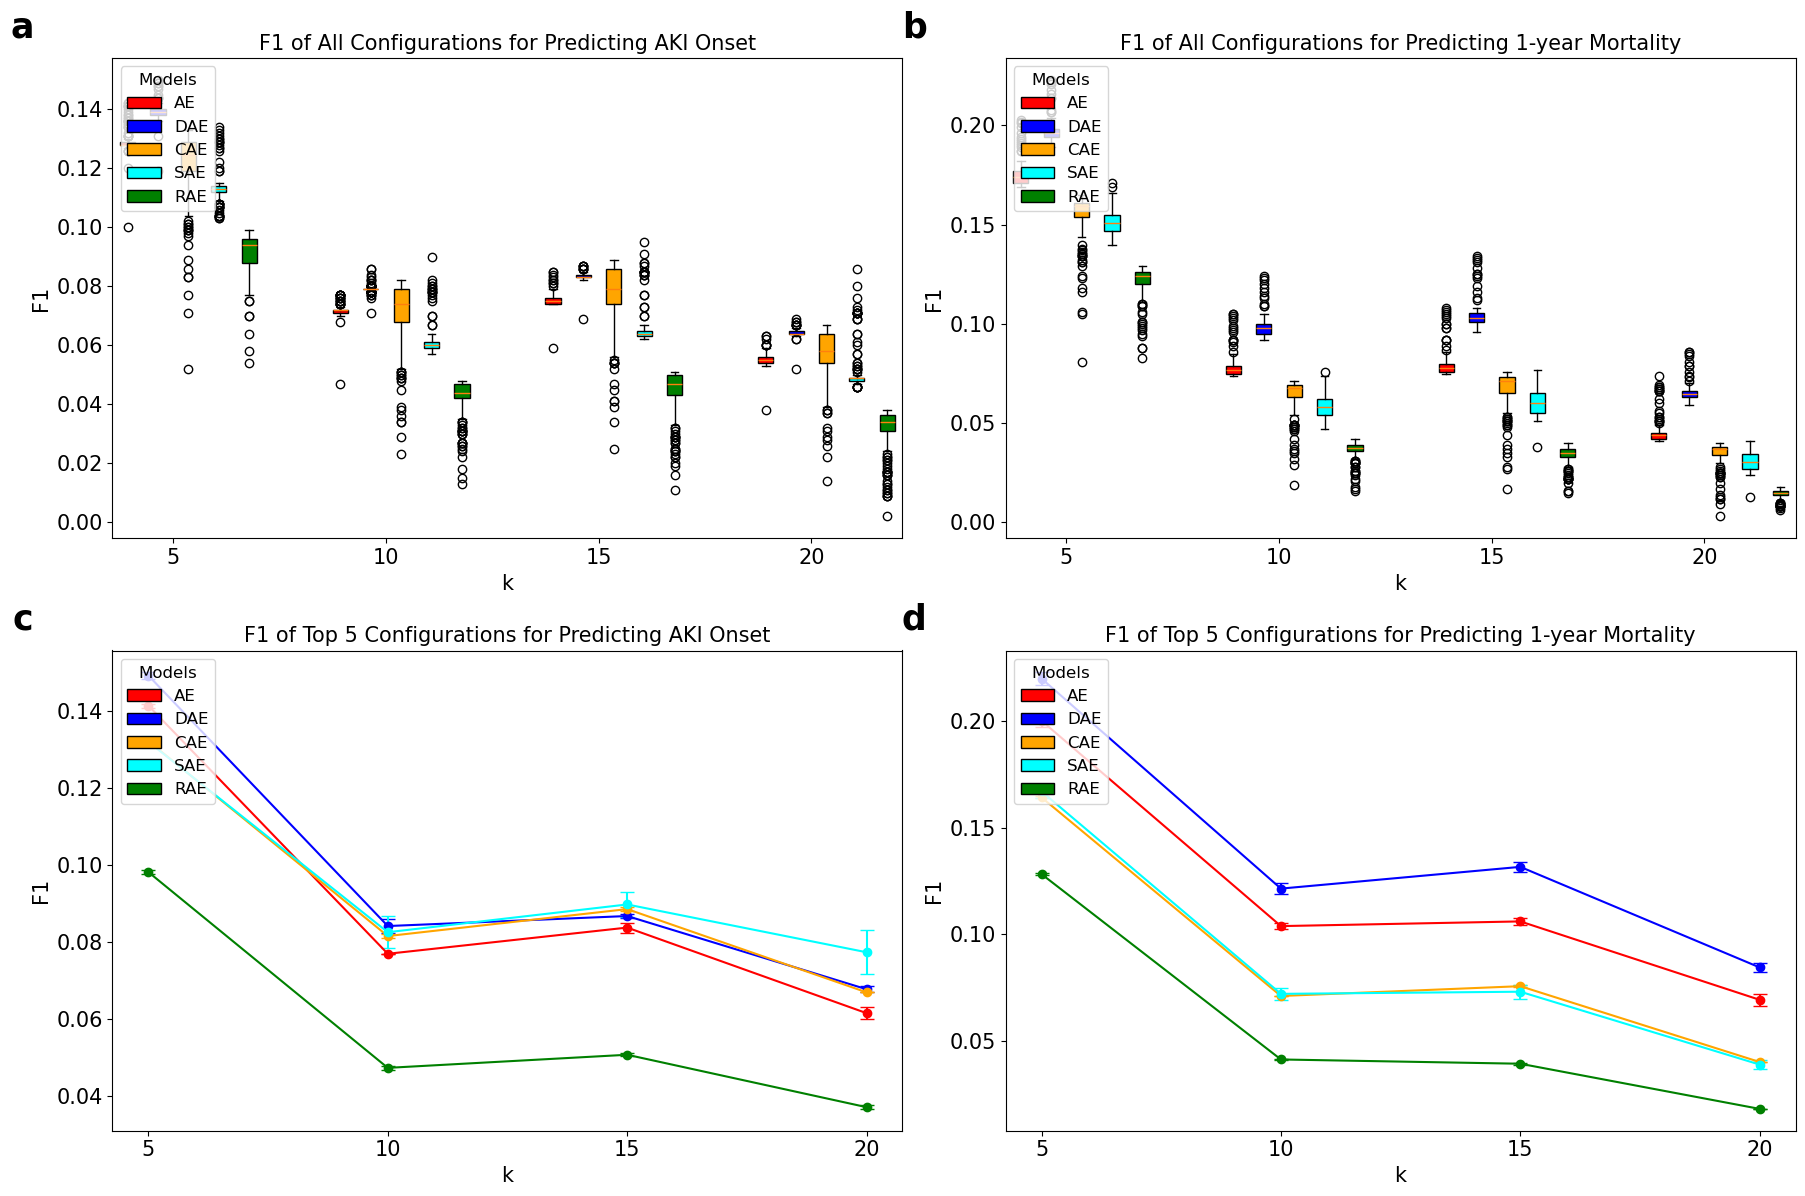

In [18]:
process_and_plot_AE_performance(results_dict, "F1")

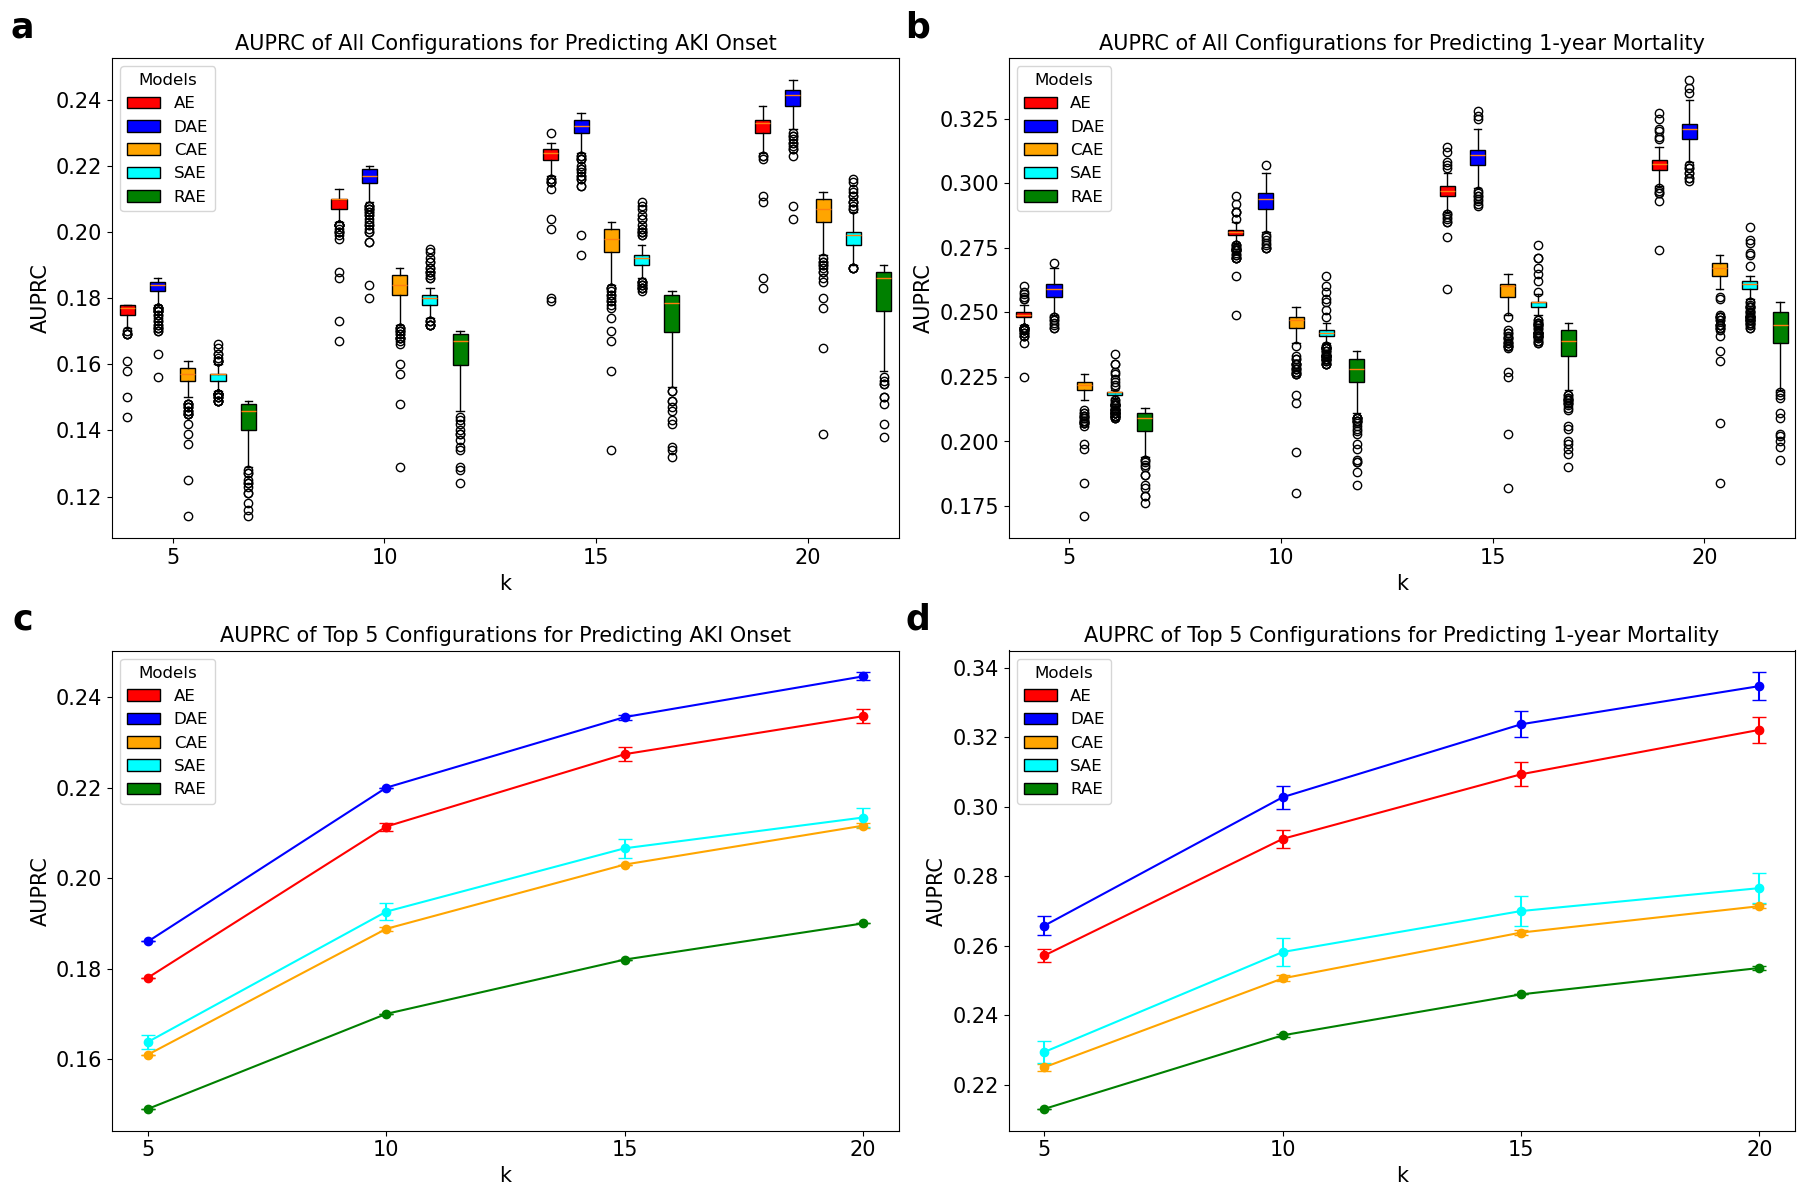

In [19]:
process_and_plot_AE_performance(results_dict, "AUPRC")

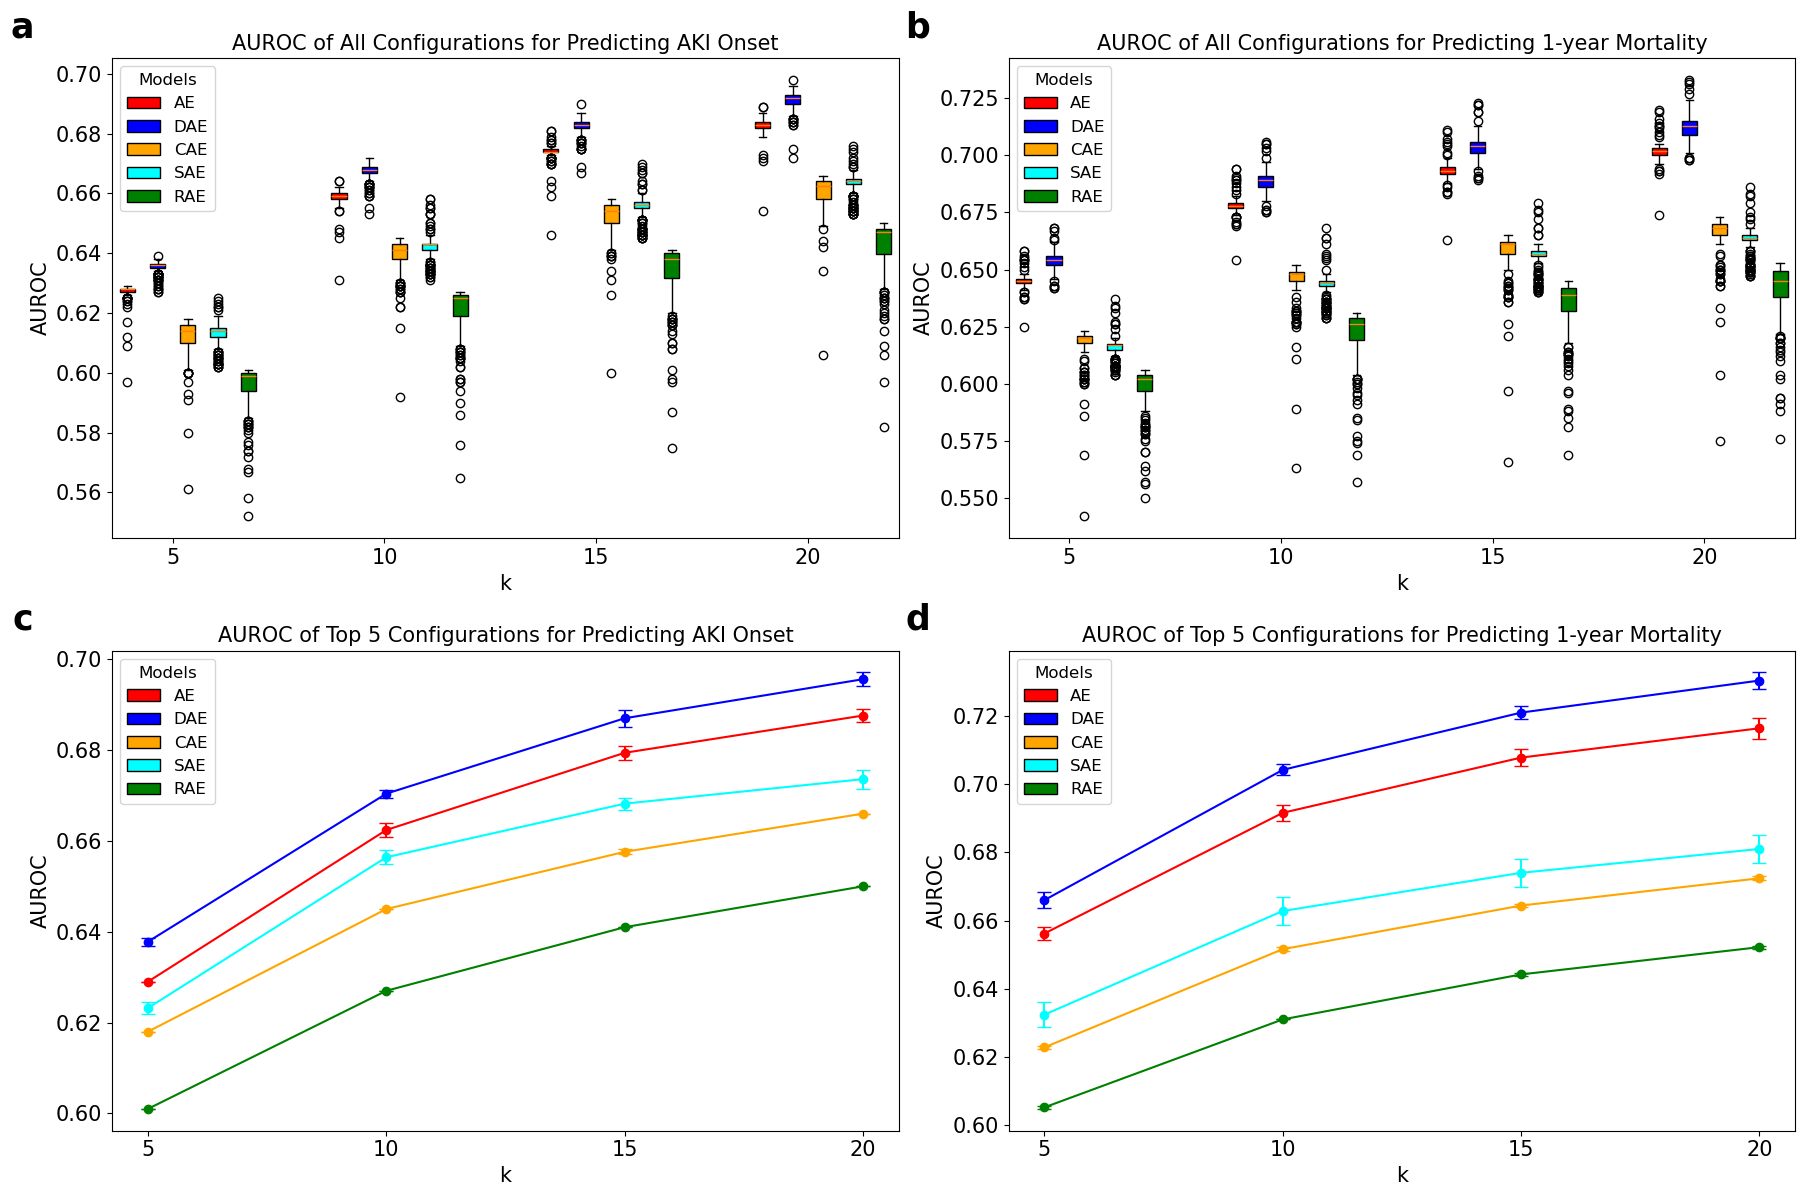

In [20]:
process_and_plot_AE_performance(results_dict, "AUROC")

# Hyperparameter Analysis

In [21]:
def process_and_plot_config_perf(results_dict, metric_name):
   BAE_Euc_perf_label_1, DAE_Euc_perf_label_1, CAE_Euc_perf_label_1, SAE_Euc_perf_label_1, RAE_Euc_perf_label_1, _, _, _, _, _ = collect_mean_perf(results_dict, metric_name)
        
   # Reading the dictionary from the file
   with open('./configurations.pkl', 'rb') as file:
      config_space = pickle.load(file)
            
   lrs, optimizers, latents, activations = get_unique_hyperparameters(config_space)
   
   
   lr_idx_dict = get_hp_idx_set(config_space, 'learning_rate', lrs)
   opt_idx_dict = get_hp_idx_set(config_space, 'optimizer', optimizers)
   lat_idx_dict = get_hp_idx_set(config_space, 'latent', latents)
   act_idx_dict = get_hp_idx_set(config_space, 'activation', activations)
   
   
   # organize performance for label 1
   BAE_lr_performance_label_1 = organize_hp_performance(BAE_Euc_perf_label_1, lr_idx_dict)
   DAE_lr_performance_label_1 = organize_hp_performance(DAE_Euc_perf_label_1, lr_idx_dict)
   CAE_lr_performance_label_1 = organize_hp_performance(CAE_Euc_perf_label_1, lr_idx_dict)
   SAE_lr_performance_label_1 = organize_hp_performance(SAE_Euc_perf_label_1, lr_idx_dict)
   RAE_lr_performance_label_1 = organize_hp_performance(RAE_Euc_perf_label_1, lr_idx_dict)

   BAE_opt_performance_label_1 = organize_hp_performance(BAE_Euc_perf_label_1, opt_idx_dict)
   DAE_opt_performance_label_1 = organize_hp_performance(DAE_Euc_perf_label_1, opt_idx_dict)
   CAE_opt_performance_label_1 = organize_hp_performance(CAE_Euc_perf_label_1, opt_idx_dict)
   SAE_opt_performance_label_1 = organize_hp_performance(SAE_Euc_perf_label_1, opt_idx_dict)
   RAE_opt_performance_label_1 = organize_hp_performance(RAE_Euc_perf_label_1, opt_idx_dict)

   BAE_lat_performance_label_1 = organize_hp_performance(BAE_Euc_perf_label_1, lat_idx_dict)
   DAE_lat_performance_label_1 = organize_hp_performance(DAE_Euc_perf_label_1, lat_idx_dict)
   CAE_lat_performance_label_1 = organize_hp_performance(CAE_Euc_perf_label_1, lat_idx_dict)
   SAE_lat_performance_label_1 = organize_hp_performance(SAE_Euc_perf_label_1, lat_idx_dict)
   RAE_lat_performance_label_1 = organize_hp_performance(RAE_Euc_perf_label_1, lat_idx_dict)

   BAE_act_performance_label_1 = organize_hp_performance(BAE_Euc_perf_label_1, act_idx_dict)
   DAE_act_performance_label_1 = organize_hp_performance(DAE_Euc_perf_label_1, act_idx_dict)
   CAE_act_performance_label_1 = organize_hp_performance(CAE_Euc_perf_label_1, act_idx_dict)
   SAE_act_performance_label_1 = organize_hp_performance(SAE_Euc_perf_label_1, act_idx_dict)
   RAE_act_performance_label_1 = organize_hp_performance(RAE_Euc_perf_label_1, act_idx_dict)
   
   
   fig, ax = plt.subplots(2, 2, figsize=(18, 12))
   plot_hp_performance(ax[0, 0], BAE_lr_performance_label_1, DAE_lr_performance_label_1, CAE_lr_performance_label_1,
                     SAE_lr_performance_label_1, RAE_lr_performance_label_1, 'Learning rates')
   plot_hp_performance(ax[0, 1], BAE_opt_performance_label_1, DAE_opt_performance_label_1, CAE_opt_performance_label_1,
                     SAE_opt_performance_label_1, RAE_opt_performance_label_1, 'Optimizers')
   plot_hp_performance(ax[1, 0], BAE_lat_performance_label_1, DAE_lat_performance_label_1, CAE_lat_performance_label_1,
                     SAE_lat_performance_label_1, RAE_lat_performance_label_1, 'Latent dimensions')
   plot_hp_performance(ax[1, 1], BAE_act_performance_label_1, DAE_act_performance_label_1, CAE_act_performance_label_1,
                     SAE_act_performance_label_1, RAE_act_performance_label_1, 'Activations')

   # Adding labels to each subplot
   labels = ['a', 'b', 'c', 'd']
   positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

   for label, i in zip(labels, positions):
      ax[i].text(-0.1, 1.1, label, transform=ax[i].transAxes,
                     fontsize=25, fontweight='bold', va='top', ha='right')

   plt.tight_layout()
   plt.savefig(result_folder + 'Figures/MCW_hyperparameters_at_20_%s.tiff'%metric_name, format='tiff', dpi = 300)
   plt.show()
   
   

In [22]:
def get_unique_hyperparameters(config_space):
    # get unique hyperparameters
    lrs = []
    optimizers = []
    latents = []
    activations = []

    for config in config_space.values():
        lr = config['learning_rate']
        opt = config['optimizer']
        lat = config['latent']
        activation = config['activation']
        if lr not in lrs:
            lrs.append(lr)
        if opt not in optimizers:
            optimizers.append(opt)
        if lat not in latents:
            latents.append(lat)
        if activation not in activations:
            activations.append(activation)
    return lrs, optimizers, latents, activations

In [23]:
def get_hp_idx_set(config_space, hp_name, hp_space):
    hp_idx_dict = dict()
    for hp in hp_space:
        hp_idx_dict[hp] = []
        for idx, config in config_space.items():
            if config[hp_name] == hp:
                hp_idx_dict[hp].append(idx)
    return hp_idx_dict

In [24]:
def organize_hp_performance(AE_results, hp_idx_dict):
    KNN_results = AE_results.loc[:, '20']
    hp_results_cluster = []
    for hp, idx_set in hp_idx_dict.items():
        hp_results_cluster.append(KNN_results[idx_set].values)
    
    hp_results_cluster_dict = dict()
    
    for i, hp in enumerate(list(hp_idx_dict.keys())):
        hp_results_cluster_dict[hp] = hp_results_cluster[i]
        
    return hp_results_cluster_dict

In [25]:
import seaborn as sns

def plot_hp_performance(ax, BAE_dict, DAE_dict, CAE_dict, SAE_dict, RAE_dict, hp_name):
    BAE_df = pd.DataFrame(BAE_dict)
    DAE_df = pd.DataFrame(DAE_dict)
    CAE_df = pd.DataFrame(CAE_dict)
    SAE_df = pd.DataFrame(SAE_dict)
    RAE_df = pd.DataFrame(RAE_dict)
    
    BAE_df['Cluster'] = 'AE'
    DAE_df['Cluster'] = 'DAE'
    CAE_df['Cluster'] = 'CAE'
    SAE_df['Cluster'] = 'SAE'
    RAE_df['Cluster'] = 'RAE'
    

    df_all = pd.concat([BAE_df, DAE_df, CAE_df, SAE_df, RAE_df])

    df_melted = df_all.melt(id_vars='Cluster', var_name=hp_name, value_name='F1')
    
    
    palette = sns.color_palette(n_colors=len(df_all.columns) - 1)
    sns.boxplot(x='Cluster', y='F1', hue=hp_name, data=df_melted, ax = ax, palette=palette)

    ax.set_title(hp_name.title(), fontsize = 20)
    ax.set_xlabel('Models', fontsize = 15)
    ax.set_ylabel('F1', fontsize = 15)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    # format legend
    handles, labels = ax.get_legend_handles_labels()

    formatted_labels = []
    for label in labels:
        try:
            formatted_label = f'{float(label):.5f}'.rstrip('0').rstrip('.')
        except ValueError:
            formatted_label = label
        formatted_labels.append(formatted_label)
    ax.legend(handles, formatted_labels, title=hp_name, fontsize=12, title_fontsize=12, loc = 'lower left')

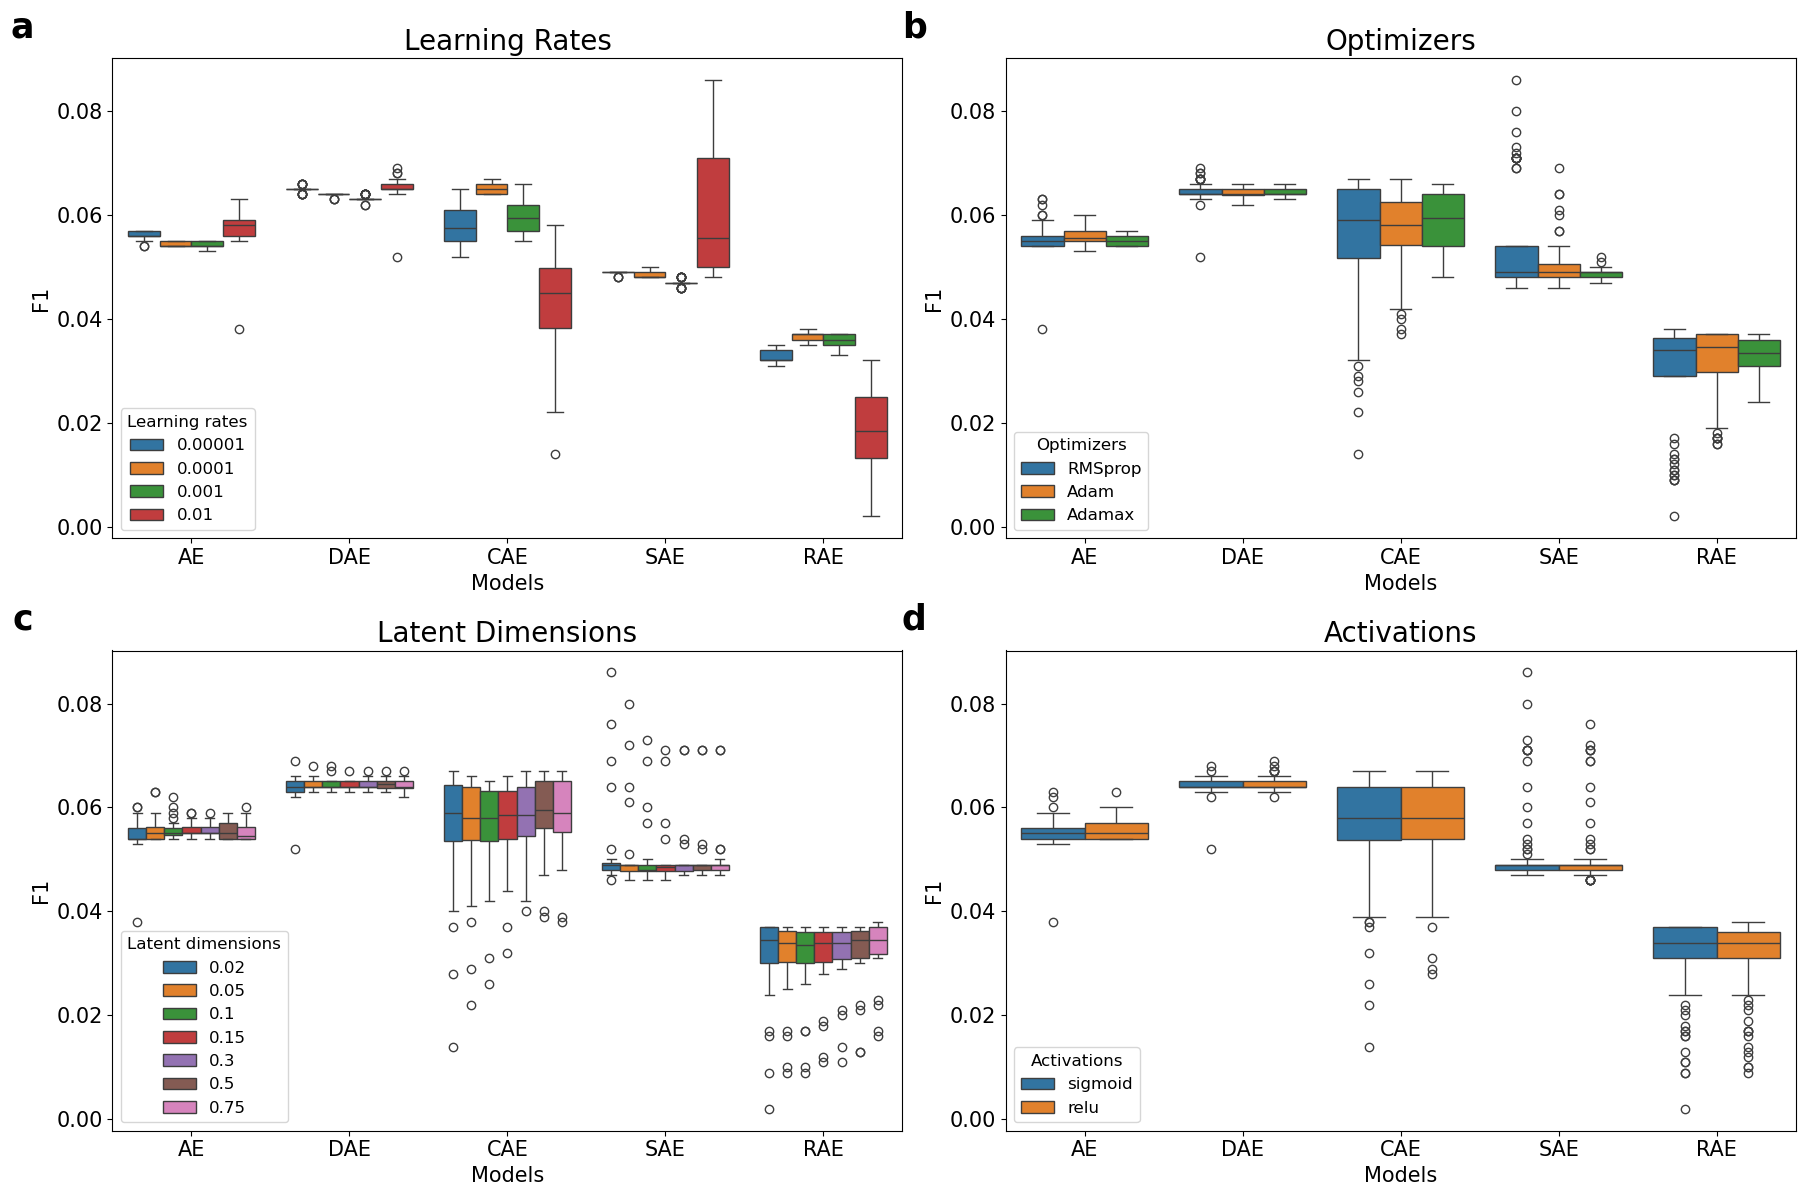

In [26]:
process_and_plot_config_perf(results_dict, "F1")

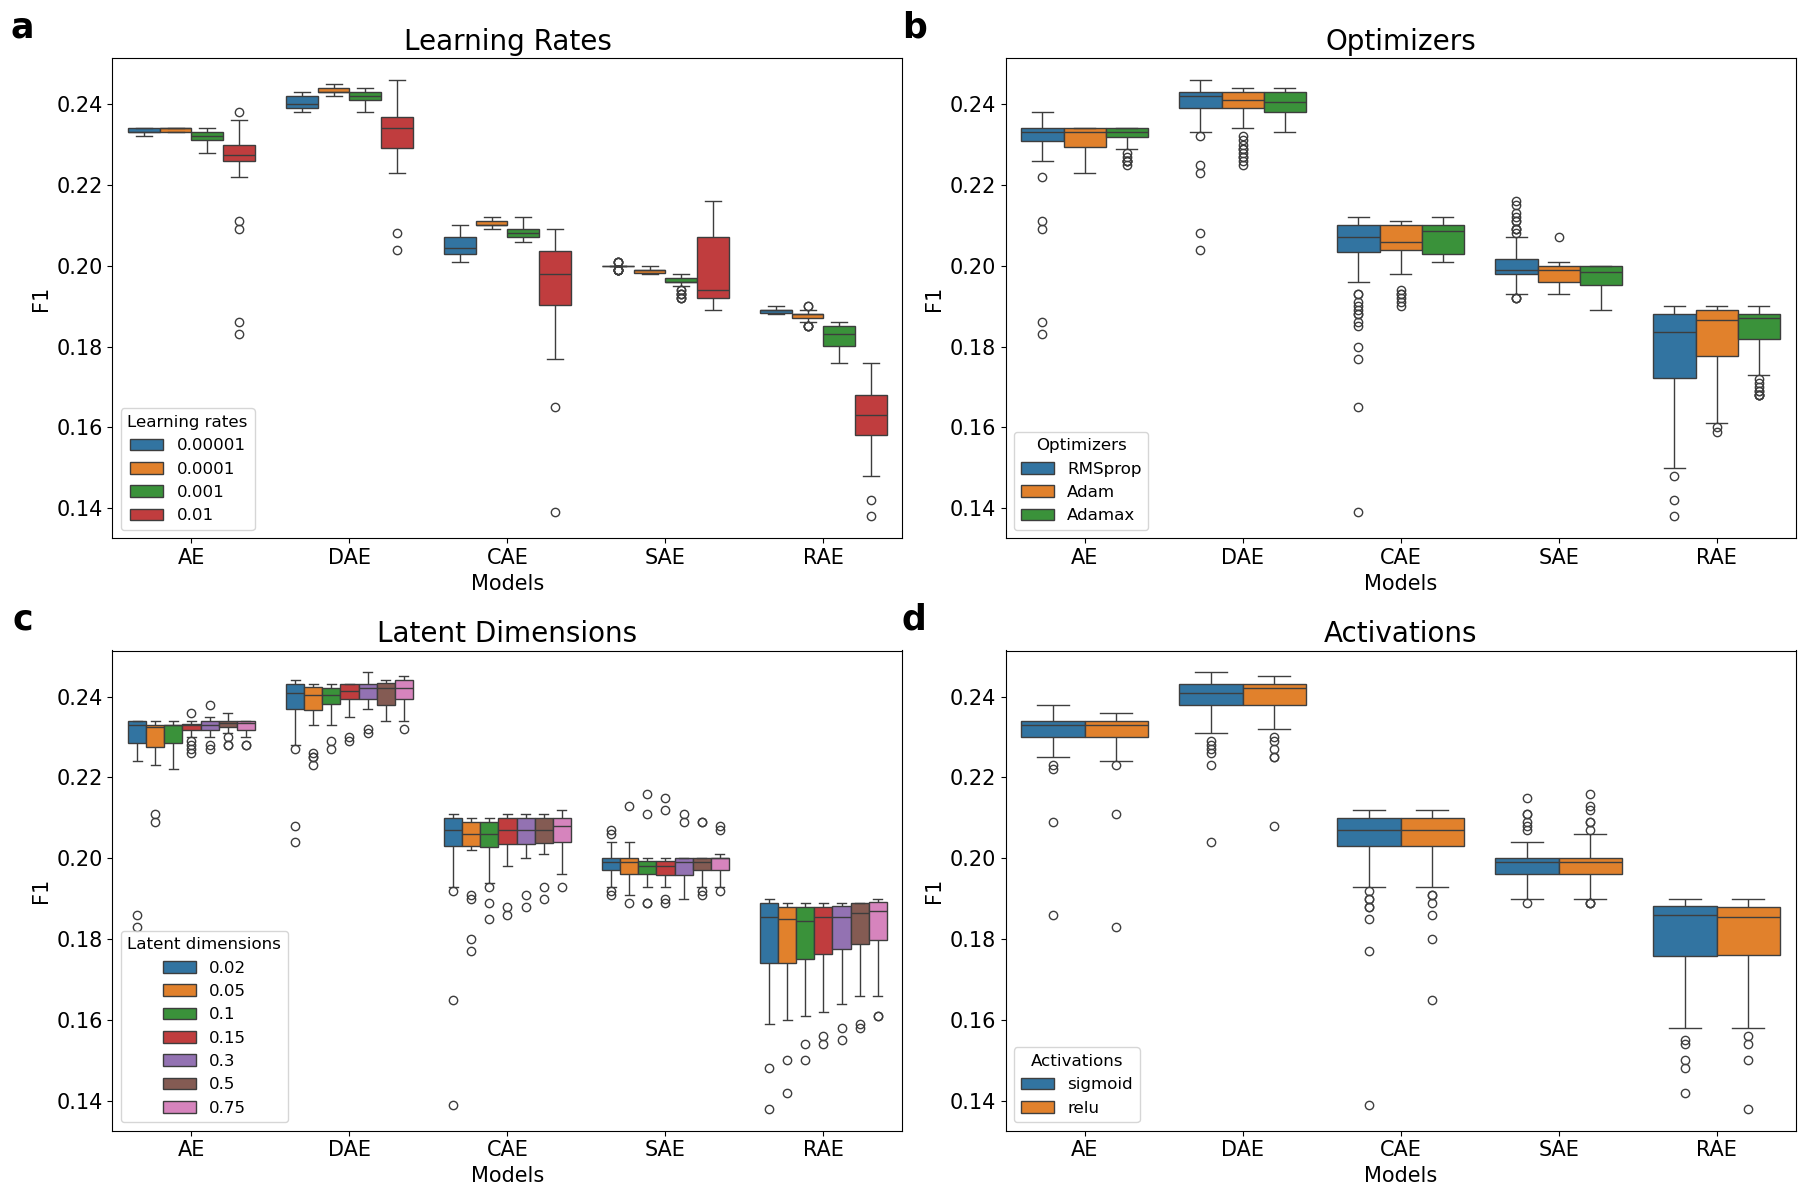

In [27]:
process_and_plot_config_perf(results_dict, "AUPRC")

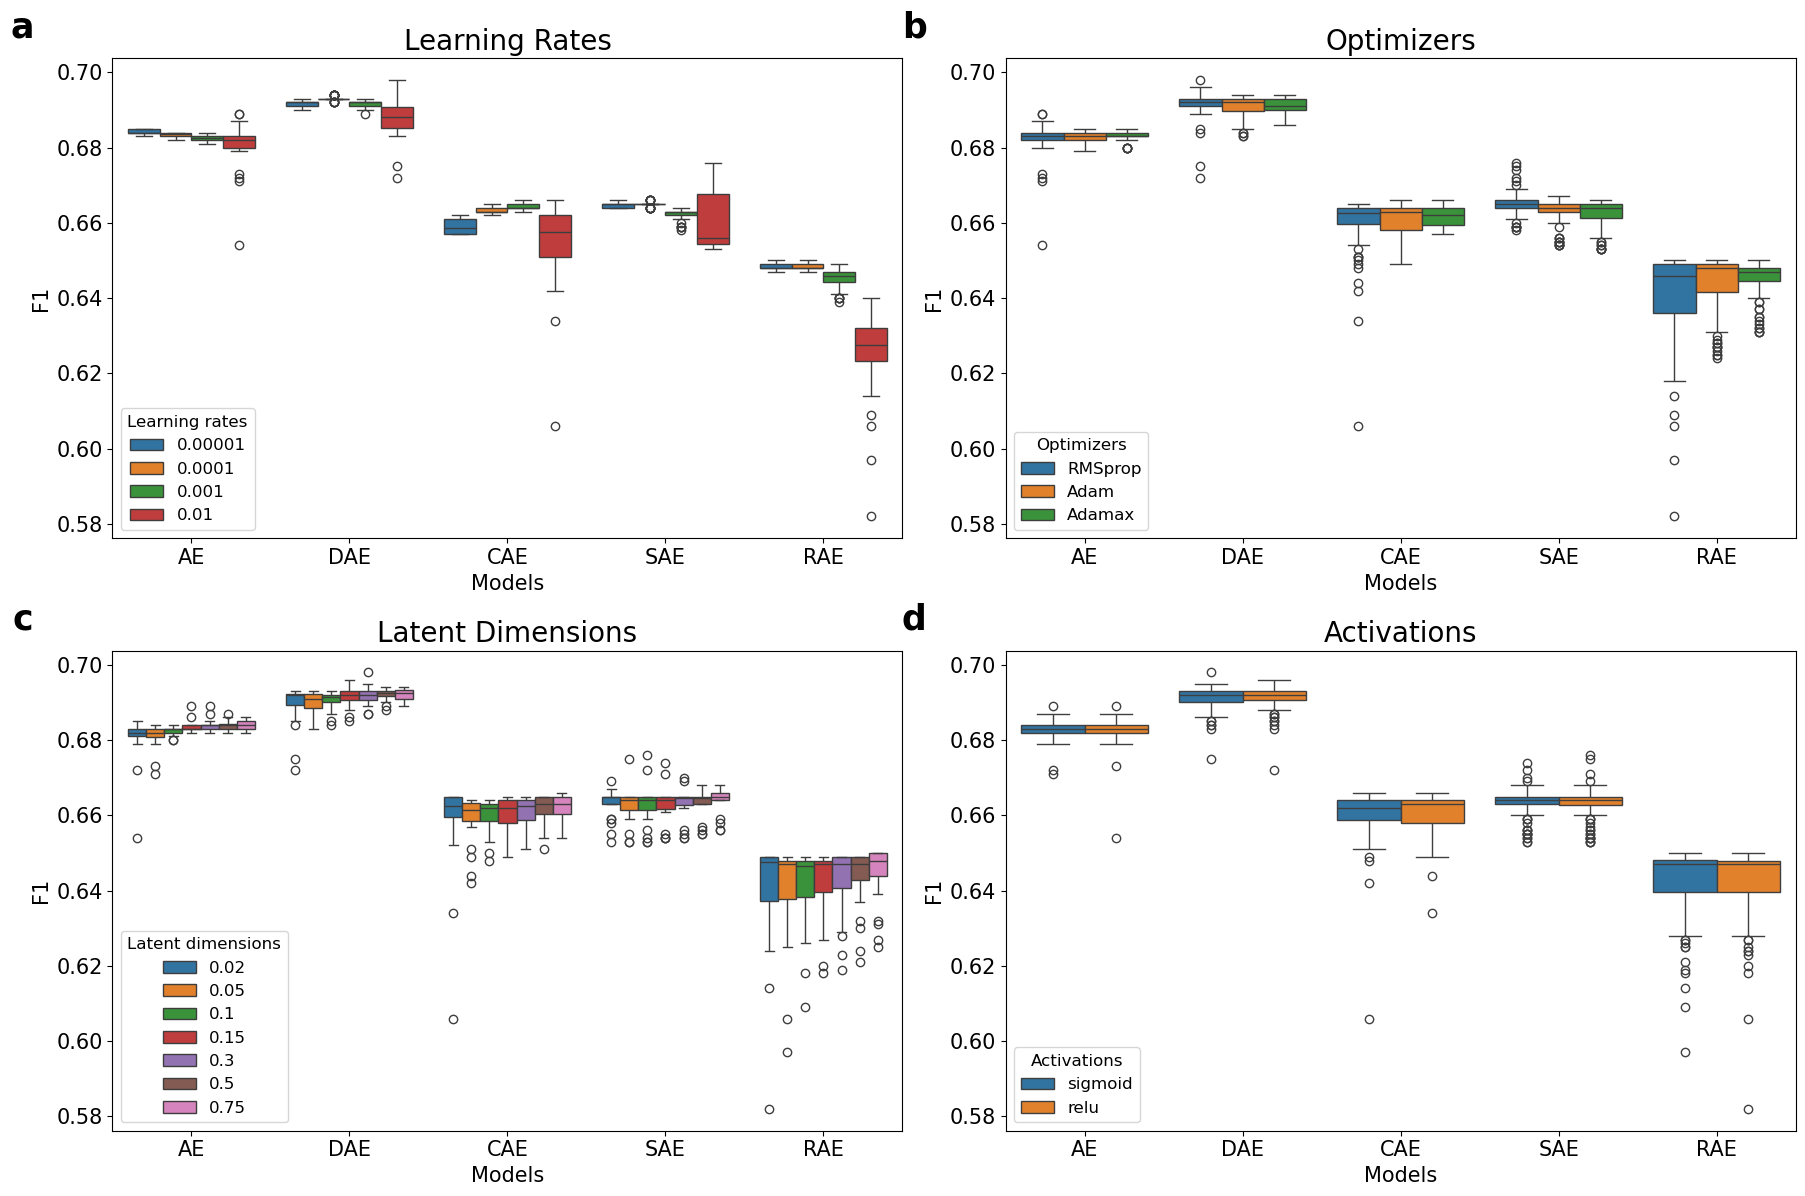

In [28]:
process_and_plot_config_perf(results_dict, "AUROC")

# External Validation

In [29]:
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
import matplotlib.gridspec as gridspec

In [30]:
def plot_external_against_internal(n_labels, knn_size_names, model_names, metric_name, results_dict, legend_loc = 'upper left'):
    results_dict_internal = read_internal_results()
    knn_internal_external_all_labels = match_internal_and_external(n_labels, knn_size_names, model_names, results_dict_internal)
    
    for label in ["Label 0", "Label 1"]:
        for k_idx in range(4):
            for ds in ['internal', 'external']:
                this_perf = knn_internal_external_all_labels[label][k_idx][ds]
                norm_perf = min_max_normalize(this_perf)
                knn_internal_external_all_labels[label][k_idx][ds] = norm_perf
                
    BAE_Euc_perf_label_1, DAE_Euc_perf_label_1, CAE_Euc_perf_label_1, SAE_Euc_perf_label_1, RAE_Euc_perf_label_1, \
        BAE_Euc_perf_label_2, DAE_Euc_perf_label_2, CAE_Euc_perf_label_2, SAE_Euc_perf_label_2, RAE_Euc_perf_label_2 = collect_mean_perf(results_dict, metric_name)

    # Create the figure and specify the overall layout
    fig = plt.figure(figsize=(18, 13))
    gs = gridspec.GridSpec(7, 4)  # 3 rows and 4 columns total

    # First row: 2 subplots spanning across 2 columns each
    ax1 = fig.add_subplot(gs[0:3, 0:2])  # First plot spans columns 0 to 1
    ax2 = fig.add_subplot(gs[0:3, 2:4])  # Second plot spans columns 2 to 3
    plot_cluster_boxplot(ax1, BAE_Euc_perf_label_1, DAE_Euc_perf_label_1, CAE_Euc_perf_label_1, SAE_Euc_perf_label_1, RAE_Euc_perf_label_1, 'AKI Onset', metric_name, legend_loc)
    plot_cluster_boxplot(ax2, BAE_Euc_perf_label_2, DAE_Euc_perf_label_2, CAE_Euc_perf_label_2, SAE_Euc_perf_label_2, RAE_Euc_perf_label_2, '1-year Mortality', metric_name, legend_loc)

    # Second row: 4 subplots, each taking one column
    ax3 = fig.add_subplot(gs[3:5, 0])
    ax4 = fig.add_subplot(gs[3:5, 1])
    ax5 = fig.add_subplot(gs[3:5, 2])
    ax6 = fig.add_subplot(gs[3:5, 3])

    plot_regression(ax3, knn_internal_external_all_labels['Label 0'][0]['internal'], knn_internal_external_all_labels['Label 0'][0]['external'], 'AKI Onset, k = 5')
    plot_regression(ax4, knn_internal_external_all_labels['Label 0'][1]['internal'], knn_internal_external_all_labels['Label 0'][1]['external'], 'AKI Onset, k = 10')
    plot_regression(ax5, knn_internal_external_all_labels['Label 0'][2]['internal'], knn_internal_external_all_labels['Label 0'][2]['external'], 'AKI Onset, k = 15')
    plot_regression(ax6, knn_internal_external_all_labels['Label 0'][3]['internal'], knn_internal_external_all_labels['Label 0'][3]['external'], 'AKI Onset, k = 20')

    # Third row: 4 subplots, each taking one column
    ax7 = fig.add_subplot(gs[5:7, 0])
    ax8 = fig.add_subplot(gs[5:7, 1])
    ax9 = fig.add_subplot(gs[5:7, 2])
    ax10 = fig.add_subplot(gs[5:7, 3])

    plot_regression(ax7, knn_internal_external_all_labels['Label 1'][0]['internal'], knn_internal_external_all_labels['Label 1'][0]['external'], '1-year Mortality, k = 5')
    plot_regression(ax8, knn_internal_external_all_labels['Label 1'][1]['internal'], knn_internal_external_all_labels['Label 1'][1]['external'], '1-year Mortality, k = 10')
    plot_regression(ax9, knn_internal_external_all_labels['Label 1'][2]['internal'], knn_internal_external_all_labels['Label 1'][2]['external'], '1-year Mortality, k = 15')
    plot_regression(ax10, knn_internal_external_all_labels['Label 1'][3]['internal'], knn_internal_external_all_labels['Label 1'][3]['external'], '1-year Mortality, k = 20')

    # Combine all axes in a list for easier iteration
    axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

    # Adding labels to each subplot
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

    for ax, label in zip(axes, labels):
        ax.text(-0.1, 1.1, label, transform=ax.transAxes,
                fontsize=25, fontweight='bold', va='top', ha='right')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.savefig(result_folder + 'Figures/MCW_perf_%s.tiff'%metric_name, format='tiff', dpi = 300)
    plt.show()

In [ ]:
def read_internal_results():
    internal_result_folder = '...'
    # Reading the dictionary from the file, results have 2 parts, mean performance and std
    with open(internal_result_folder + 'AE_results.pkl', 'rb') as file:
        BAE_results_dict_internal = pickle.load(file)
    with open(internal_result_folder + 'DAE_results.pkl', 'rb') as file:
        DAE_results_dict_internal = pickle.load(file)
    with open(internal_result_folder + 'CAE_results.pkl', 'rb') as file:
        CAE_results_dict_internal = pickle.load(file)
    with open(internal_result_folder + 'SAE_results.pkl', 'rb') as file:
        SAE_results_dict_internal = pickle.load(file)
    with open(internal_result_folder + 'RAE_results.pkl', 'rb') as file:
        RAE_results_dict_internal = pickle.load(file)
        
    results_dict_internal = {
        'AE': BAE_results_dict_internal,
        'DAE': DAE_results_dict_internal,
        'CAE': CAE_results_dict_internal,
        'SAE': SAE_results_dict_internal,
        'RAE': RAE_results_dict_internal
    }
    return results_dict_internal

In [32]:
def match_internal_and_external(n_labels, knn_size_names, model_names, results_dict_internal):
    # Reading the dictionary from the file
    with open('./configurations.pkl', 'rb') as file:
        config_space = pickle.load(file)

    knn_internal_external_all_labels = {}
    for m in range(n_labels):
        knn_internal_external_collection = []
        for i in range(len(knn_size_names)):
            internal_external_pair = {'internal': [], 'external': []}
            for name in model_names:
                for k in range(len(config_space)):
                    internal_external_pair['external'].append(results_dict[name][k]['performance mean']['F1'][i][m])
                    internal_external_pair['internal'].append(results_dict_internal[name][k]['performance mean']['F1'][i][m])
            knn_internal_external_collection.append(internal_external_pair)
        knn_internal_external_all_labels['Label %s'%(m)] = knn_internal_external_collection
    return knn_internal_external_all_labels

In [33]:
def plot_regression(ax, x, y, title):
    x_reshaped = np.array(x).reshape(-1, 1)
    y = np.array(y)
    
    model = LinearRegression()
    model.fit(x_reshaped, y)
    
    y_pred = model.predict(x_reshaped)
    
    rou, p_val = spearmanr(y, y_pred)
    
    n = len(x)
    fifth = n // 5
    
    ax.scatter(x[:fifth], y[:fifth], color=model_colors['AE'], label='AE', s=20)
    ax.scatter(x[fifth:2*fifth], y[fifth:2*fifth], color=model_colors['DAE'], label='DAE', s=20)
    ax.scatter(x[2*fifth:3*fifth], y[2*fifth:3*fifth], color=model_colors['CAE'], label='CAE', s=20)
    ax.scatter(x[3*fifth:4*fifth], y[3*fifth:4*fifth], color=model_colors['SAE'], label='SAE', s=20)
    ax.scatter(x[4*fifth:], y[4*fifth:], color=model_colors['RAE'], label='RAE', s=20)
    
    ax.plot(x, y_pred, color='black')
    
    rou_text = f'$\\rho = {rou:.2f}$'
    ax.text(0.95, 0.05, rou_text, fontsize=22, color='black', 
            verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes)
    
    ax.set_title(title, fontsize = 15)
    ax.set_xlabel('F1 on KUMC cohort')
    ax.set_ylabel('F1 on MCW cohort')
    ax.legend(loc = 'upper left')

In [34]:
def min_max_normalize(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

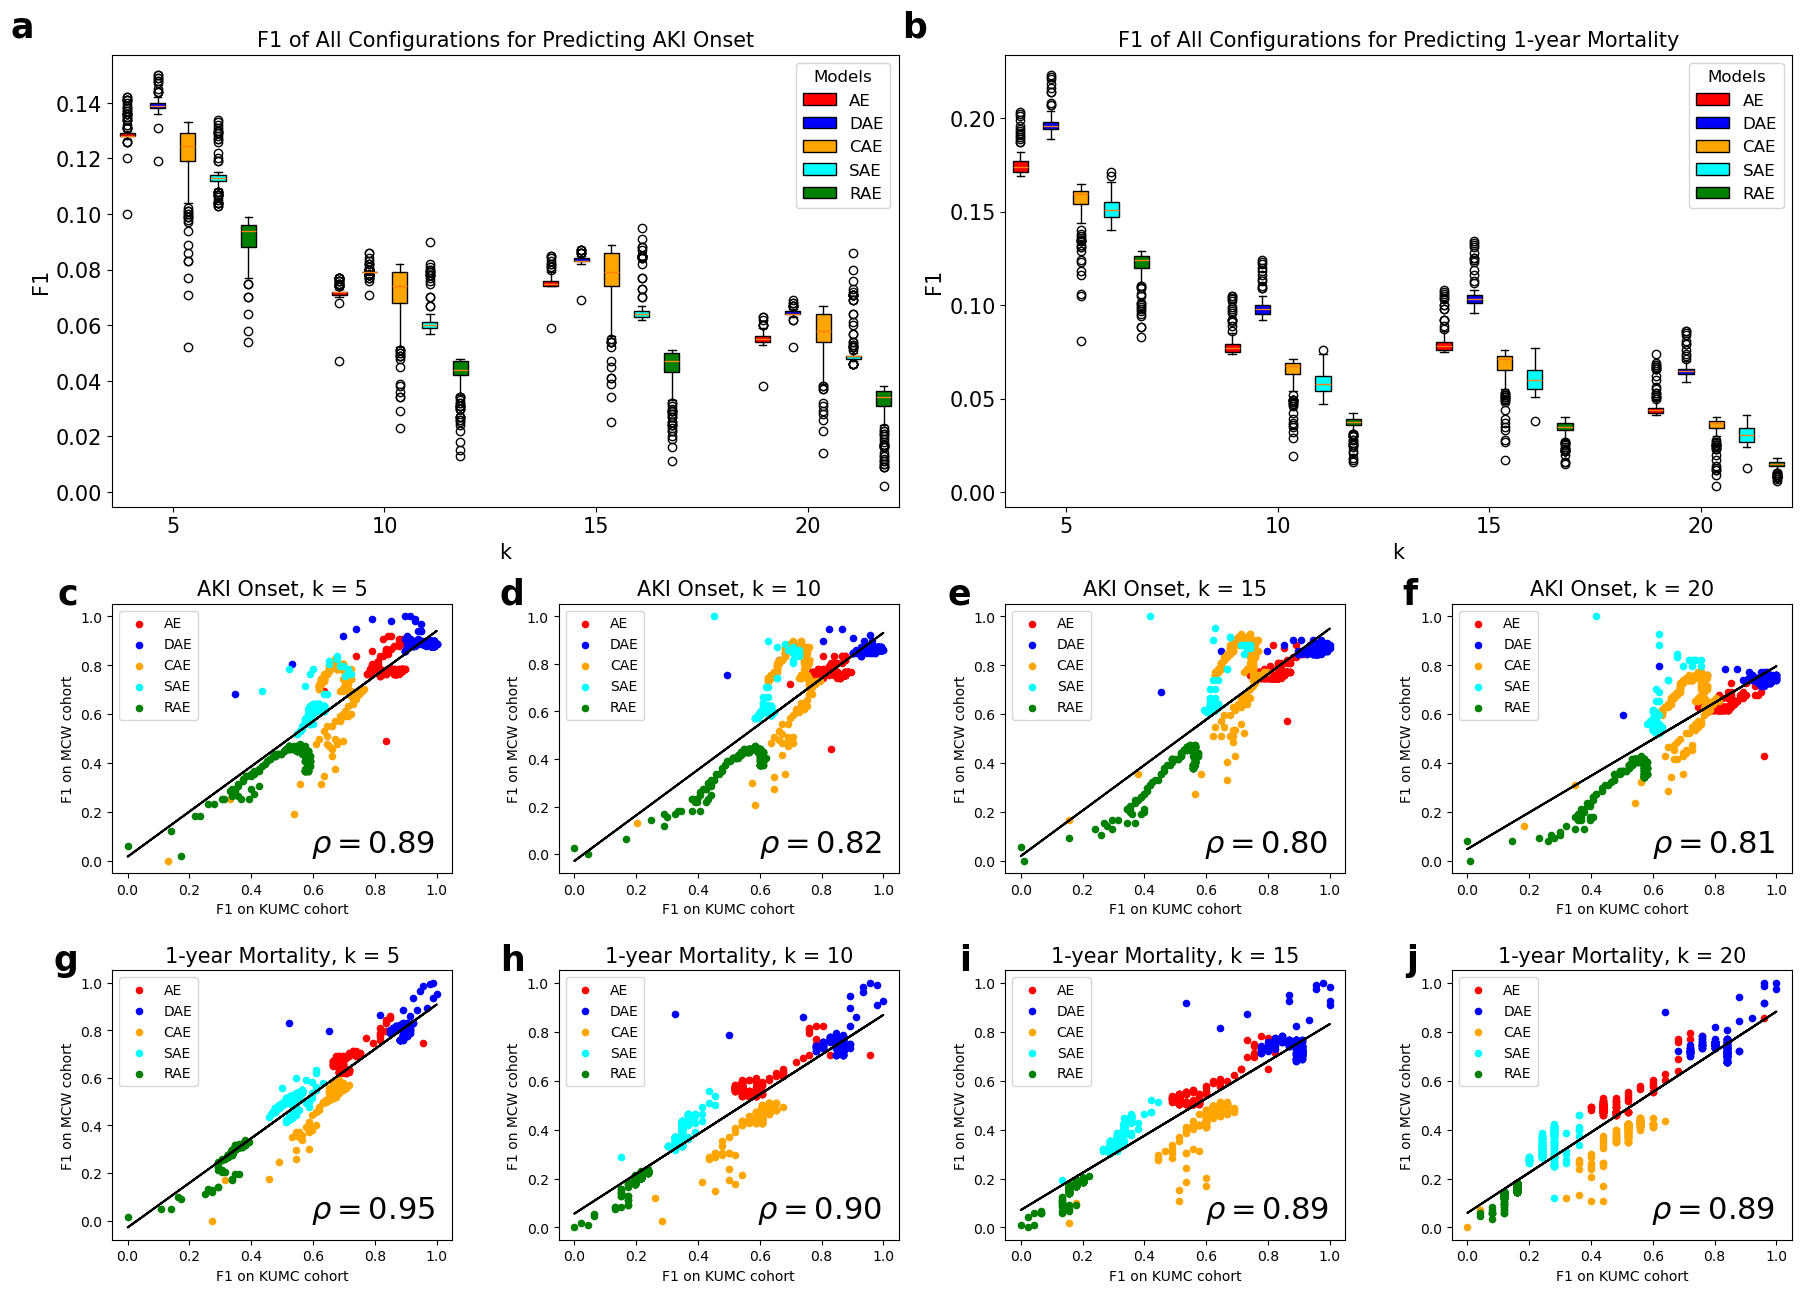

In [35]:
plot_external_against_internal(n_labels, knn_size_names, model_names, "F1", results_dict, 'upper right')

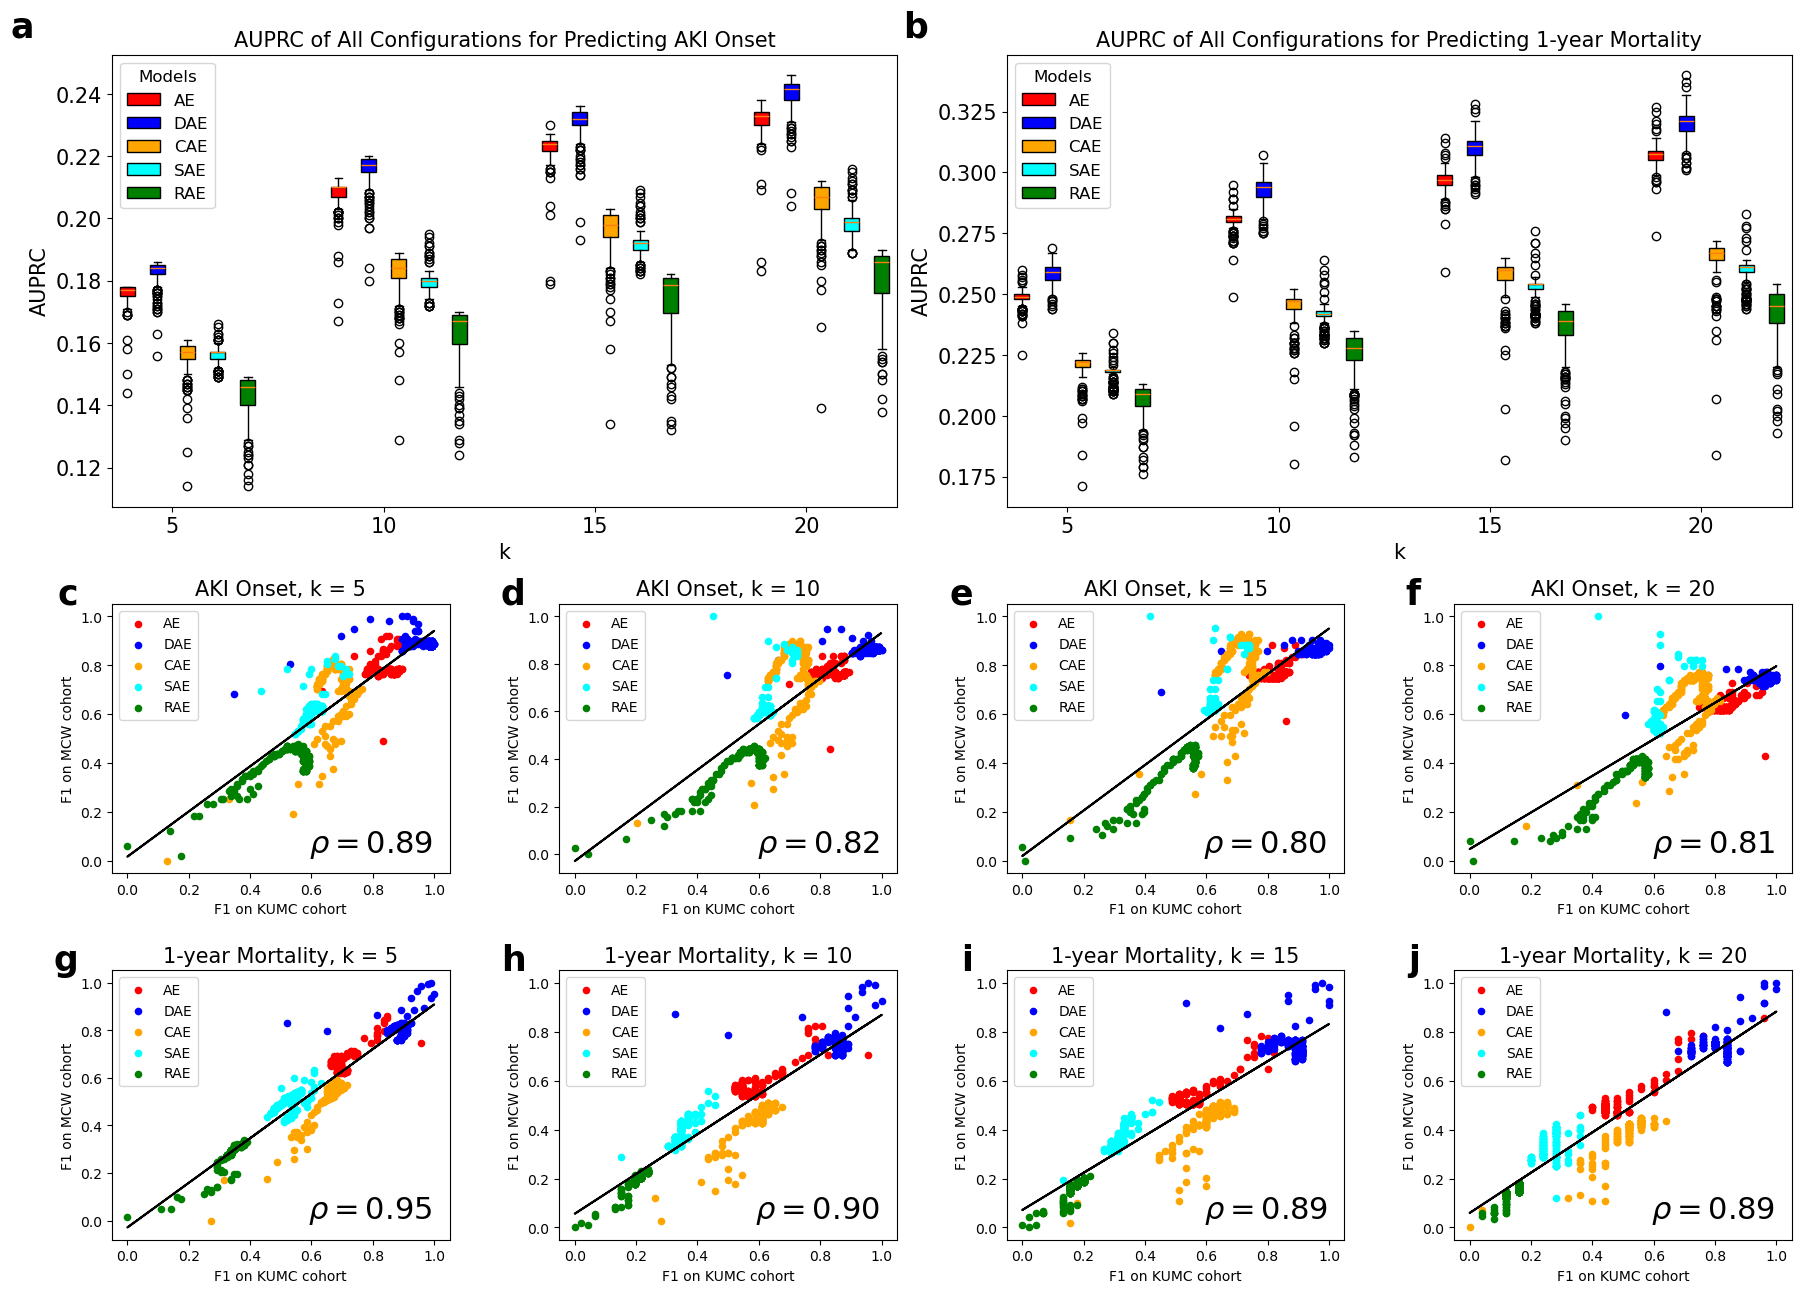

In [36]:
plot_external_against_internal(n_labels, knn_size_names, model_names, "AUPRC", results_dict)

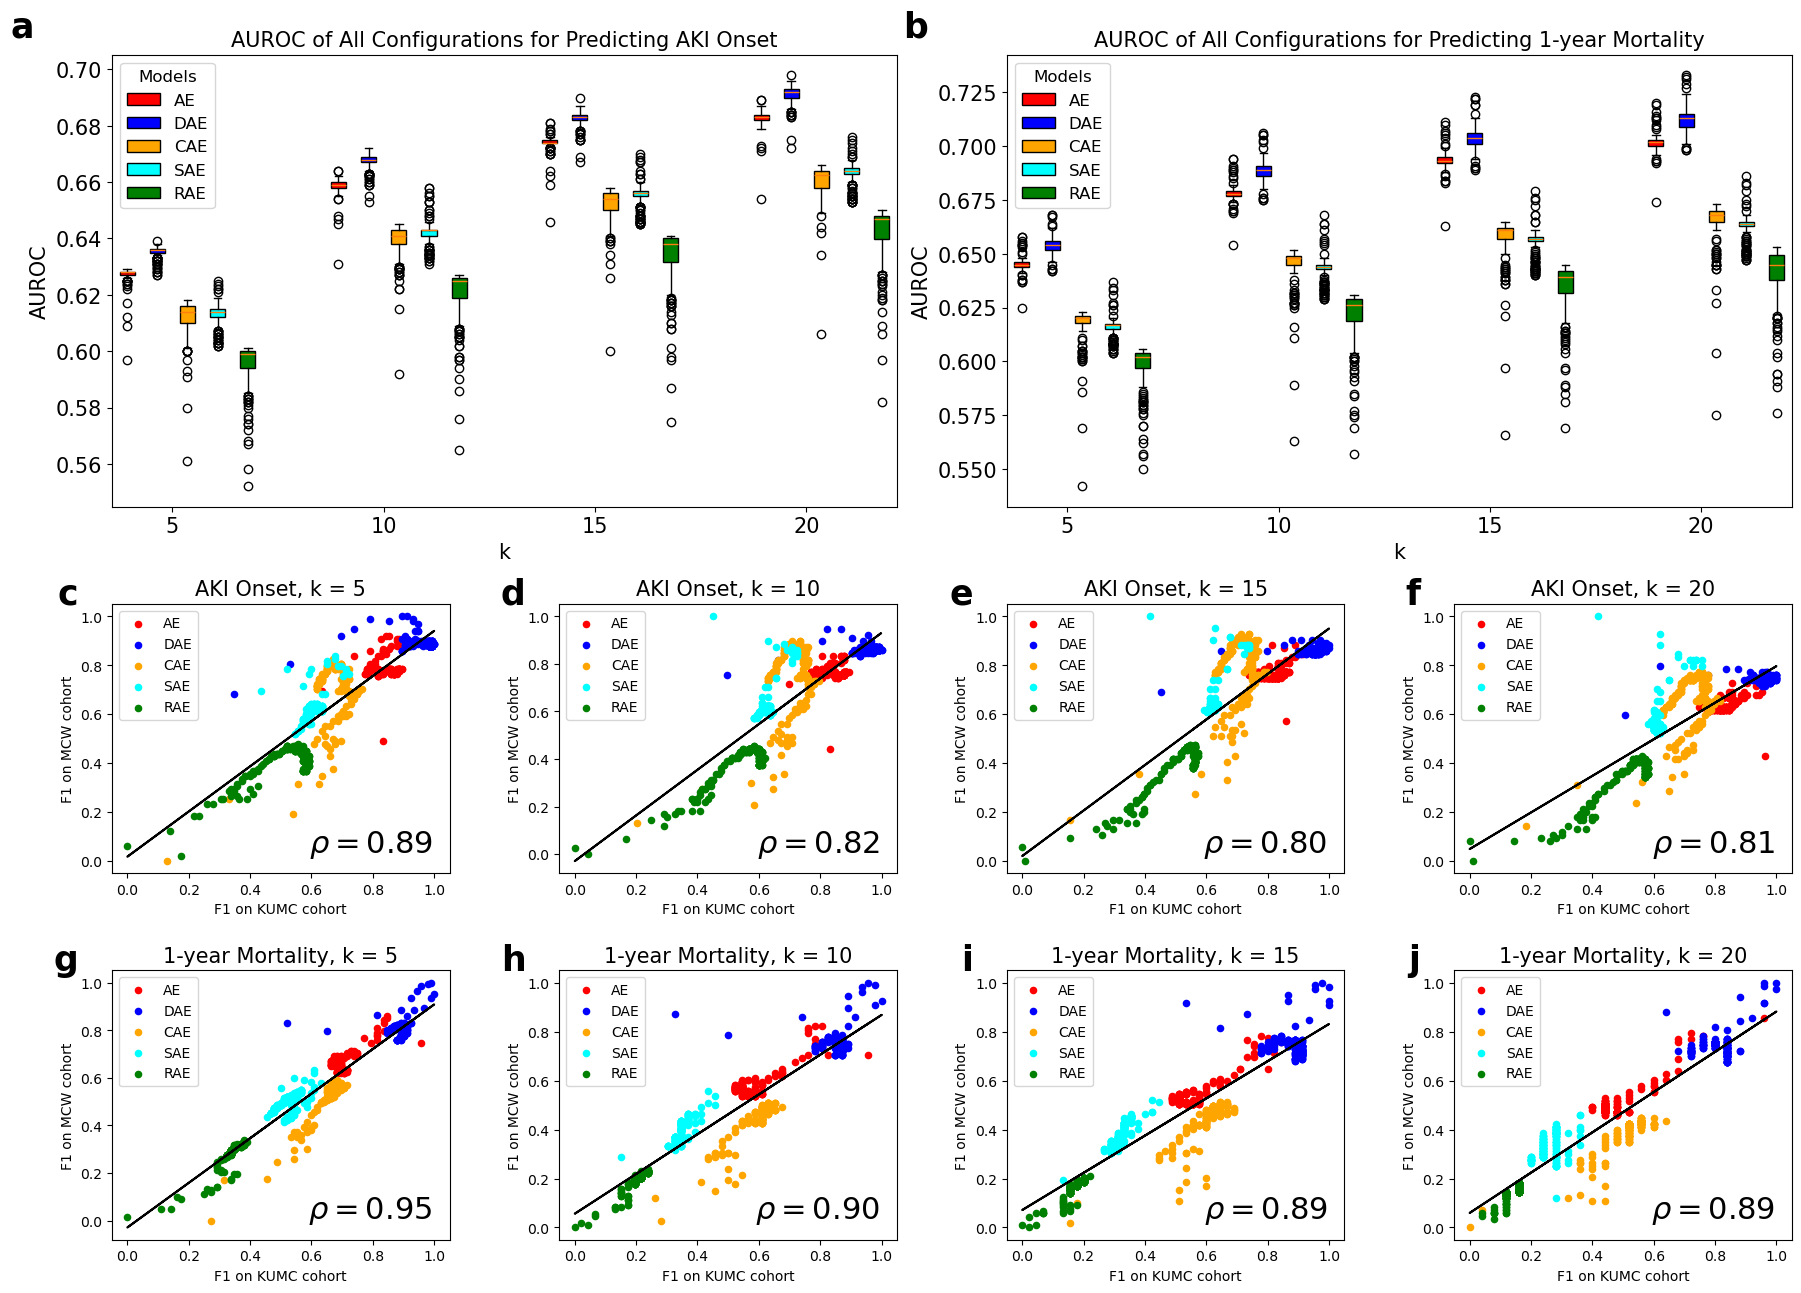

In [37]:
plot_external_against_internal(n_labels, knn_size_names, model_names, "AUROC", results_dict)

# Metric Learning without Latent Control

In [ ]:
import os
import fnmatch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score
from metric_learn import LMNN, NCA, MLKR

In [ ]:
def load_npy_files_from_folder(folder_path, lat_control = False):

    npy_files = []  
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if lat_control:
                if fnmatch.fnmatch(file, '*_lat.npy'):
                    npy_files.append(file)
            else:  
                if fnmatch.fnmatch(file, '*.npy') and not fnmatch.fnmatch(file, '*_lat.npy'):
                    npy_files.append(file)

    # Sort the files alphabetically
    npy_files.sort()
    print(npy_files)

    # Load each .npy file
    data_list = []
    for file_name in npy_files:
        file_path = os.path.join(folder_path, file_name)
        data = np.load(file_path)
        data_list.append(data)

    return data_list

In [ ]:
base_path = "..."
transformation_list = load_npy_files_from_folder(base_path)

['AE_transformed_test_0.npy', 'AE_transformed_test_1.npy', 'AE_transformed_test_2.npy', 'AE_transformed_test_3.npy', 'AE_transformed_test_4.npy', 'AE_transformed_train_0.npy', 'AE_transformed_train_1.npy', 'AE_transformed_train_2.npy', 'AE_transformed_train_3.npy', 'AE_transformed_train_4.npy', 'CAE_transformed_test_0.npy', 'CAE_transformed_test_1.npy', 'CAE_transformed_test_2.npy', 'CAE_transformed_test_3.npy', 'CAE_transformed_test_4.npy', 'CAE_transformed_train_0.npy', 'CAE_transformed_train_1.npy', 'CAE_transformed_train_2.npy', 'CAE_transformed_train_3.npy', 'CAE_transformed_train_4.npy', 'DAE_transformed_test_0.npy', 'DAE_transformed_test_1.npy', 'DAE_transformed_test_2.npy', 'DAE_transformed_test_3.npy', 'DAE_transformed_test_4.npy', 'DAE_transformed_train_0.npy', 'DAE_transformed_train_1.npy', 'DAE_transformed_train_2.npy', 'DAE_transformed_train_3.npy', 'DAE_transformed_train_4.npy', 'RAE_transformed_test_0.npy', 'RAE_transformed_test_1.npy', 'RAE_transformed_test_2.npy', 'RAE

In [49]:
len(transformation_list)

60

In [ ]:
n_CV = 5

In [ ]:
# raw data
Raw_trans_test = transformation_list[10 * n_CV:11 * n_CV]
Raw_trans_train = transformation_list[11 * n_CV:12 * n_CV]

In [ ]:
# k = 5 best AE model transformed data
BAE_trans_test = transformation_list[:1 * n_CV]
BAE_trans_train = transformation_list[1 * n_CV:2 * n_CV]
CAE_trans_test = transformation_list[2 * n_CV:3 * n_CV]
CAE_trans_train = transformation_list[3 * n_CV:4 * n_CV]
DAE_trans_test = transformation_list[4 * n_CV:5 * n_CV]
DAE_trans_train = transformation_list[5 * n_CV:6 * n_CV]
RAE_trans_test = transformation_list[6 * n_CV:7 * n_CV]
RAE_trans_train = transformation_list[7 * n_CV:8 * n_CV]
SAE_trans_test = transformation_list[8 * n_CV:9 * n_CV]
SAE_trans_train = transformation_list[9 * n_CV:10 * n_CV]

In [ ]:
def evaluate_metric_learning_cv(AE_trans_train, AE_trans_test, n_neighbors):
    
    Euc_perf_scores = []
    LMNN_perf_scores = [] 
    NCA_perf_scores = [] 
    MLKR_perf_scores = [] 
    
    for i in tqdm(range(n_CV)):
        train_data = AE_trans_train[i]
        test_data = AE_trans_test[i]
        
        Euc_perf_scores.append(evaluate_metric_learning(None, 'Euc', train_data, test_data, n_neighbors))
        LMNN_perf_scores.append(evaluate_metric_learning(LMNN, 'LMNN', train_data, test_data, n_neighbors))
        NCA_perf_scores.append(evaluate_metric_learning(NCA, 'NCA', train_data, test_data, n_neighbors))
        MLKR_perf_scores.append(evaluate_metric_learning(MLKR, 'MLKR', train_data, test_data, n_neighbors))
    
    results_dict = {
        'Euc': {'mean': np.mean(Euc_perf_scores), 'std': np.std(Euc_perf_scores)},
        'LMNN': {'mean': np.mean(LMNN_perf_scores), 'std': np.std(LMNN_perf_scores)},
        'NCA': {'mean': np.mean(NCA_perf_scores), 'std': np.std(NCA_perf_scores)},
        'MLKR': {'mean': np.mean(MLKR_perf_scores), 'std': np.std(MLKR_perf_scores)},
    }
    return results_dict

In [ ]:
def evaluate_metric_learning(model_class, model_name, train_data, test_data, n_neighbors):
    X_train, y_train = train_data[:, :-1], train_data[:, -1]
    X_test, y_test = test_data[:, :-1], test_data[:, -1]
    
    if model_class is not None:
        if model_name == 'NCA':
            model = model_class(max_iter=5000)
        elif model_name == 'LMNN':
            model = model_class(n_neighbors=n_neighbors)
        else:
            model = model_class()
            
        model.fit(X_train, y_train)
    
    if model_class is None:
        metric = 'euclidean'
    else:
        metric = model.get_metric()
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_prob = knn.predict_proba(X_test)[:, 1]
    auprc = average_precision_score(y_test, y_prob)
    return auprc

Main Run

In [ ]:
# evaluate at k = 5
n_neighbors = 5
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Raw_metr_lear_results = evaluate_metric_learning_cv(Raw_trans_train, Raw_trans_test, n_neighbors)
    with open(result_folder + 'Metric_learning/Raw_metr_lear_results.pkl', 'wb') as file:
        pickle.dump(Raw_metr_lear_results, file)
    
    BAE_metr_lear_results = evaluate_metric_learning_cv(BAE_trans_train, BAE_trans_test, n_neighbors)
    with open(result_folder + 'Metric_learning/BAE_metr_lear_results.pkl', 'wb') as file:
        pickle.dump(BAE_metr_lear_results, file)
    
    DAE_metr_lear_results = evaluate_metric_learning_cv(DAE_trans_train, DAE_trans_test, n_neighbors)
    with open(result_folder + 'Metric_learning/DAE_metr_lear_results.pkl', 'wb') as file:
        pickle.dump(DAE_metr_lear_results, file)
    
    CAE_metr_lear_results = evaluate_metric_learning_cv(CAE_trans_train, CAE_trans_test, n_neighbors)
    with open(result_folder + 'Metric_learning/CAE_metr_lear_results.pkl', 'wb') as file:
        pickle.dump(CAE_metr_lear_results, file)
    
    SAE_metr_lear_results = evaluate_metric_learning_cv(SAE_trans_train, SAE_trans_test, n_neighbors)
    with open(result_folder + 'Metric_learning/SAE_metr_lear_results.pkl', 'wb') as file:
        pickle.dump(SAE_metr_lear_results, file)
    
    RAE_metr_lear_results = evaluate_metric_learning_cv(RAE_trans_train, RAE_trans_test, n_neighbors)
    with open(result_folder + 'Metric_learning/RAE_metr_lear_results.pkl', 'wb') as file:
        pickle.dump(RAE_metr_lear_results, file)

100%|██████████| 5/5 [3:28:23<00:00, 2500.74s/it]  


In [54]:
metric_learn_names = ['Euc', 'LMNN', 'NCA', 'MLKR']
metr_lear_k_5_df = pd.DataFrame(0.0, index = ['Raw'] + model_names, columns = metric_learn_names)

In [ ]:
# Reading the dictionary from the file
with open(result_folder + 'Metric_learning/Raw_metr_lear_results.pkl', 'rb') as file:
    Raw_metr_lear_results = pickle.load(file)
with open(result_folder + 'Metric_learning/BAE_metr_lear_results.pkl', 'rb') as file:
    BAE_metr_lear_results = pickle.load(file)
with open(result_folder + 'Metric_learning/DAE_metr_lear_results.pkl', 'rb') as file:
    DAE_metr_lear_results = pickle.load(file)
with open(result_folder + 'Metric_learning/CAE_metr_lear_results.pkl', 'rb') as file:
    CAE_metr_lear_results = pickle.load(file)
with open(result_folder + 'Metric_learning/SAE_metr_lear_results.pkl', 'rb') as file:
    SAE_metr_lear_results = pickle.load(file)
with open(result_folder + 'Metric_learning/RAE_metr_lear_results.pkl', 'rb') as file:
    RAE_metr_lear_results = pickle.load(file)

In [56]:
metr_lear_results_dict = {
    'Raw': Raw_metr_lear_results,
    'AE': BAE_metr_lear_results,
    'DAE': DAE_metr_lear_results,
    'CAE': CAE_metr_lear_results,
    'SAE': SAE_metr_lear_results,
    'RAE': RAE_metr_lear_results,
}

In [57]:
def assign_metr_lear_performance(metr_lear_df, k, metr_lear_results_dict):
    metr_lear_df = metr_lear_df.astype('object')
    raw_and_model_names = ['Raw'] + model_names
    for model_name in raw_and_model_names:
        for metr_lear in metric_learn_names:
            perf_mean = metr_lear_results_dict[model_name][metr_lear]['mean']
            perf_std = metr_lear_results_dict[model_name][metr_lear]['std']
            metr_lear_df.loc[model_name, metr_lear] = "{:.3f} ({:.3f})".format(perf_mean, perf_std)
    return metr_lear_df

In [58]:
metr_lear_k_5_df = assign_metr_lear_performance(metr_lear_k_5_df, 5, metr_lear_results_dict)

In [59]:
metr_lear_k_5_df

,Euc,LMNN,NCA,MLKR
Raw,0.095 (0.015),0.266 (0.030),0.172 (0.043),0.194 (0.038)
AE,0.100 (0.015),0.112 (0.027),0.112 (0.050),0.112 (0.030)
DAE,0.110 (0.017),0.199 (0.029),0.138 (0.034),0.158 (0.037)
CAE,0.165 (0.045),0.152 (0.036),0.185 (0.053),0.175 (0.056)
SAE,0.106 (0.057),0.124 (0.058),0.126 (0.062),0.111 (0.038)
RAE,0.089 (0.026),0.206 (0.042),0.124 (0.048),0.217 (0.047)


In [ ]:
metr_lear_k_5_df.to_csv(result_folder + 'Metric_learning/MCW_metric_learn.csv', index = True)

# Metric Learning with Latent Control

In [61]:
transformation_list_lat = load_npy_files_from_folder(base_path, True)

['AE_transformed_test_0_lat.npy', 'AE_transformed_test_1_lat.npy', 'AE_transformed_test_2_lat.npy', 'AE_transformed_test_3_lat.npy', 'AE_transformed_test_4_lat.npy', 'AE_transformed_train_0_lat.npy', 'AE_transformed_train_1_lat.npy', 'AE_transformed_train_2_lat.npy', 'AE_transformed_train_3_lat.npy', 'AE_transformed_train_4_lat.npy', 'CAE_transformed_test_0_lat.npy', 'CAE_transformed_test_1_lat.npy', 'CAE_transformed_test_2_lat.npy', 'CAE_transformed_test_3_lat.npy', 'CAE_transformed_test_4_lat.npy', 'CAE_transformed_train_0_lat.npy', 'CAE_transformed_train_1_lat.npy', 'CAE_transformed_train_2_lat.npy', 'CAE_transformed_train_3_lat.npy', 'CAE_transformed_train_4_lat.npy', 'DAE_transformed_test_0_lat.npy', 'DAE_transformed_test_1_lat.npy', 'DAE_transformed_test_2_lat.npy', 'DAE_transformed_test_3_lat.npy', 'DAE_transformed_test_4_lat.npy', 'DAE_transformed_train_0_lat.npy', 'DAE_transformed_train_1_lat.npy', 'DAE_transformed_train_2_lat.npy', 'DAE_transformed_train_3_lat.npy', 'DAE_tran

In [62]:
len(transformation_list_lat)

50

In [ ]:
# k = 5 best AE model transformed data
BAE_trans_test_lat = transformation_list_lat[:1 * n_CV]
BAE_trans_train_lat = transformation_list_lat[1 * n_CV:2 * n_CV]
CAE_trans_test_lat = transformation_list_lat[2 * n_CV:3 * n_CV]
CAE_trans_train_lat = transformation_list_lat[3 * n_CV:4 * n_CV]
DAE_trans_test_lat = transformation_list_lat[4 * n_CV:5 * n_CV]
DAE_trans_train_lat = transformation_list_lat[5 * n_CV:6 * n_CV]
RAE_trans_test_lat = transformation_list_lat[6 * n_CV:7 * n_CV]
RAE_trans_train_lat = transformation_list_lat[7 * n_CV:8 * n_CV]
SAE_trans_test_lat = transformation_list_lat[8 * n_CV:9 * n_CV]
SAE_trans_train_lat = transformation_list_lat[9 * n_CV:10 * n_CV]

Main run

In [ ]:
# evaluate at k = 5
n_neighbors = 5
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # we do not need to run for raw again
    
    BAE_metr_lear_results_lat = evaluate_metric_learning_cv(BAE_trans_train_lat, BAE_trans_test_lat, n_neighbors)
    with open(result_folder + 'Metric_learning/BAE_metr_lear_results_lat.pkl', 'wb') as file:
        pickle.dump(BAE_metr_lear_results_lat, file)
    
    DAE_metr_lear_results_lat = evaluate_metric_learning_cv(DAE_trans_train_lat, DAE_trans_test_lat, n_neighbors)
    with open(result_folder + 'Metric_learning/DAE_metr_lear_results_lat.pkl', 'wb') as file:
        pickle.dump(DAE_metr_lear_results_lat, file)
    
    CAE_metr_lear_results_lat = evaluate_metric_learning_cv(CAE_trans_train_lat, CAE_trans_test_lat, n_neighbors)
    with open(result_folder + 'Metric_learning/CAE_metr_lear_results_lat.pkl', 'wb') as file:
        pickle.dump(CAE_metr_lear_results_lat, file)
    
    SAE_metr_lear_results_lat = evaluate_metric_learning_cv(SAE_trans_train_lat, SAE_trans_test_lat, n_neighbors)
    with open(result_folder + 'Metric_learning/SAE_metr_lear_results_lat.pkl', 'wb') as file:
        pickle.dump(SAE_metr_lear_results_lat, file)
    
    RAE_metr_lear_results_lat = evaluate_metric_learning_cv(RAE_trans_train_lat, RAE_trans_test_lat, n_neighbors)
    with open(result_folder + 'Metric_learning/RAE_metr_lear_results_lat.pkl', 'wb') as file:
        pickle.dump(RAE_metr_lear_results_lat, file)

In [64]:
metric_learn_names = ['Euc', 'LMNN', 'NCA', 'MLKR']
metr_lear_k_5_df_lat = pd.DataFrame(0.0, index = ['Raw'] + model_names, columns = metric_learn_names)

In [ ]:
# Reading the dictionary from the file
with open(result_folder + 'Metric_learning/Raw_metr_lear_results.pkl', 'rb') as file:
    Raw_metr_lear_results_lat = pickle.load(file)
with open(result_folder + 'Metric_learning/BAE_metr_lear_results_lat.pkl', 'rb') as file:
    BAE_metr_lear_results_lat = pickle.load(file)
with open(result_folder + 'Metric_learning/DAE_metr_lear_results_lat.pkl', 'rb') as file:
    DAE_metr_lear_results_lat = pickle.load(file)
with open(result_folder + 'Metric_learning/CAE_metr_lear_results_lat.pkl', 'rb') as file:
    CAE_metr_lear_results_lat = pickle.load(file)
with open(result_folder + 'Metric_learning/SAE_metr_lear_results_lat.pkl', 'rb') as file:
    SAE_metr_lear_results_lat = pickle.load(file)
with open(result_folder + 'Metric_learning/RAE_metr_lear_results_lat.pkl', 'rb') as file:
    RAE_metr_lear_results_lat = pickle.load(file)

In [66]:
metr_lear_results_dict_lat = {
    'Raw': Raw_metr_lear_results_lat,
    'AE': BAE_metr_lear_results_lat,
    'DAE': DAE_metr_lear_results_lat,
    'CAE': CAE_metr_lear_results_lat,
    'SAE': SAE_metr_lear_results_lat,
    'RAE': RAE_metr_lear_results_lat,
}

In [67]:
metr_lear_k_5_df_lat = assign_metr_lear_performance(metr_lear_k_5_df_lat, 5, metr_lear_results_dict_lat)

In [68]:
metr_lear_k_5_df_lat

,Euc,LMNN,NCA,MLKR
Raw,0.095 (0.015),0.266 (0.030),0.172 (0.043),0.194 (0.038)
AE,0.111 (0.034),0.154 (0.015),0.127 (0.042),0.134 (0.050)
DAE,0.116 (0.027),0.154 (0.042),0.147 (0.025),0.148 (0.059)
CAE,0.186 (0.037),0.153 (0.041),0.164 (0.079),0.181 (0.019)
SAE,0.106 (0.022),0.088 (0.037),0.090 (0.026),0.110 (0.034)
RAE,0.101 (0.025),0.220 (0.039),0.133 (0.062),0.194 (0.033)


In [ ]:
metr_lear_k_5_df_lat.to_csv(result_folder + 'Metric_learning/MCW_metric_learn_lat.csv', index = True)